<a href="https://colab.research.google.com/github/igor-xmchaves/igor-xmchaves/blob/main/Igor_Chaves_Trabalho_Final_Laborat%C3%B3rio_de_Ci%C3%AAncia_de_Dados_UFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Final - Modelagem de Predição e Classificação**


*   **Aluno**: Igor Xavier Martins Chaves
*   **Matrícula**: 495179 | **Curso**: Ciência de Dados



# **Etapa 1: Preparação e Organização dos Dados**

##  **Atividade (1.a): Preencher o Canvas de Dados**

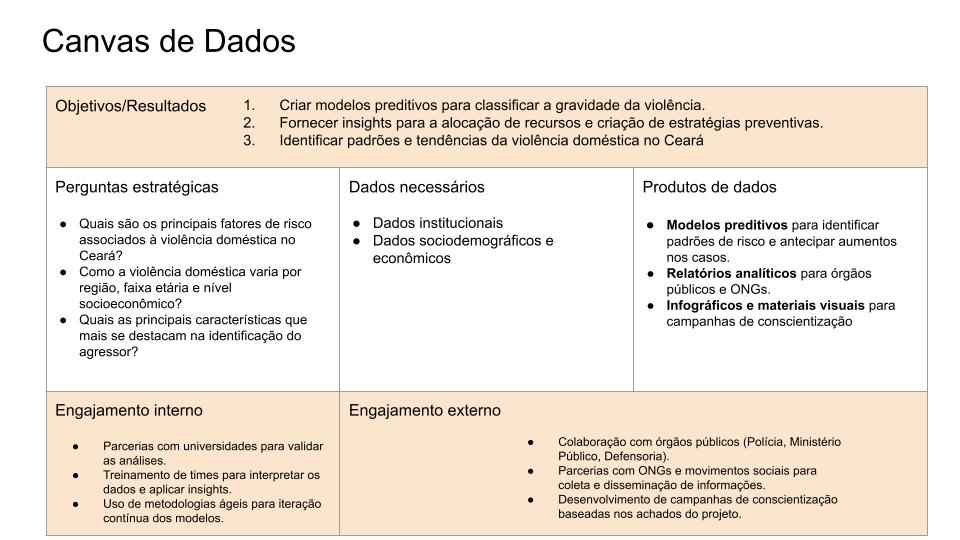

## **Atividade (1.b): Reorganização dos Dados para Modelagem**

* Ajustar os dados para utilização em modelos preditivos, considerando
pré-processamento adequado.
* Definir as variáveis-alvo e características preditivas (features).
*  Criar um conjunto de treino e teste adequado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Configuração para exibir gráficos inline (no Jupyter Notebook)
%matplotlib inline

In [ ]:
# Carregando os dados
path_file = '/content/drive/MyDrive/Classroom/UFC 2024.2 Laboratório de Ciência de Dados/Formulario Avaliacao de Risco - Respostas Anonimizadas 3.xlsx'
dfs = pd.read_excel(path_file, sheet_name=None)

In [ ]:
print("Planilhas disponíveis:", list(dfs.keys()))

Planilhas disponíveis: ['Formularios Avaliacao Risco', 'Pontos por Formulario', 'Vitimas por Formulario', 'Quant Formularios x Vitimas', 'Cidade x Ocorrência']


**Visualização e pré-processamento das planilhas do dataset:**

In [ ]:
# Exibindo da primeira planilha
df1 = dfs['Formularios Avaliacao Risco']
df1

,Formulario,Pergunta,Resposta,Pontos,Complemento
0,1,O(A) agressor(a) já ameaçou você ou algum fami...,Não,0,NaN
1,1,O(A) agressor(a) já praticou alguma(s) destas ...,Soco,1,NaN
2,1,O(A) agressor(a) já praticou alguma(s) destas ...,Tapa,1,NaN
3,1,O(A) agressor(a) já praticou alguma(s) destas ...,Empurrão,1,NaN
4,1,Você necessitou de atendimento médico e/ou int...,Não,0,NaN
...,...,...,...,...,...
650774,16594,Com qual cor/raça você se identifica:,Parda,0,NaN
650775,16594,"Você considera que mora em bairro, comunidade,...",Não,0,NaN
650776,16594,Qual sua situação de moradia?,Própria,0,NaN
650777,16594,Você se considera dependente financeiramente d...,Sim,1,NaN


In [ ]:
# Tratamento dos dados da primeira planilha
new_df1 = df1.copy()
new_df1.drop(['Complemento', 'Pontos'], axis=1, inplace=True)

new_df1

,Formulario,Pergunta,Resposta
0,1,O(A) agressor(a) já ameaçou você ou algum fami...,Não
1,1,O(A) agressor(a) já praticou alguma(s) destas ...,Soco
2,1,O(A) agressor(a) já praticou alguma(s) destas ...,Tapa
3,1,O(A) agressor(a) já praticou alguma(s) destas ...,Empurrão
4,1,Você necessitou de atendimento médico e/ou int...,Não
...,...,...,...
650774,16594,Com qual cor/raça você se identifica:,Parda
650775,16594,"Você considera que mora em bairro, comunidade,...",Não
650776,16594,Qual sua situação de moradia?,Própria
650777,16594,Você se considera dependente financeiramente d...,Sim


In [ ]:
new_df1_grouped = new_df1.groupby(['Formulario', 'Pergunta'])['Resposta'].agg(list).reset_index()
new_df1_grouped

,Formulario,Pergunta,Resposta
0,1,As ameaças ou agressões físicas do(a) agressor...,[Não]
1,1,Estão vivendo algum conflito com relação à gua...,[Não]
2,1,O agressor já descumpriu medida protetiva ante...,[Sim]
3,1,O(A) agressor(a) está com dificuldades finance...,[Não]
4,1,O(A) agressor(a) faz uso abusivo de álcool ou ...,"[Sim, de drogas]"
...,...,...,...
552508,16594,Você quer e aceita abrigamento temporário?,[Não]
552509,16594,Você se considera dependente financeiramente d...,[Sim]
552510,16594,Você se separou recentemente do(a) agressor(a)...,[Sim]
552511,16594,Você sofreu algum tipo de violência durante a ...,[Não]


In [ ]:
# Converter os valores agregados (listas) em valores escalares:
# Se a lista tiver apenas um elemento, retorna esse elemento;
# Caso contrário, junta os elementos com separador ', '
new_df1_grouped['Resposta'] = new_df1_grouped['Resposta'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) == 1 else (', '.join(map(str, x)) if isinstance(x, list) else x)
)

In [ ]:
# Pivoteamento dacoluna 'Pergunta' para serem usadas como features
df1_pivot = new_df1_grouped.pivot(index="Formulario", columns="Pergunta", values="Resposta").reset_index()
new_df1 = df1_pivot.copy()

new_df1

Pergunta,Formulario,A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?,Algum de seus filhos é pessoa com deficiência?,As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?,Com qual cor/raça você se identifica:,"Durante o atendimento, a vítima demonstra percepção de risco sobre sua situação? A percepção é de existência ou inexistência do risco? (por exemplo, ela diz que o agressor pode matá-la, ou ela justifica o comportamento do agressor ou naturaliza o comportamento violento?). Anote a percepção e explique.",Está tomando medicação controlada?,"Estão vivendo algum conflito com relação à guarda do(s) filho(s), visitas ou pagamento de pensão pelo(a) agressor(a)?",Existe o risco de a vítima tentar suicídio ou existem informações de que tenha tentado se matar?,"Existem outras informações relevantes com relação ao contexto ou situação da vítima e que possam indicar risco de novas agressões? (Por exemplo, a vítima tem novo(a) companheiro(a) ou tomou decisões que anunciam um rompimento definitivo com o agressor (pretende mudar de casa, bairro, cidade).",...,"Você considera que mora em bairro, comunidade, área rural ou local de risco de violência?",Você está grávida ou teve bebê nos últimos 18 meses?,Você já registrou ocorrência policial ou formulou pedido de medida protetiva de urgência envolvendo esse(a) mesmo(a) agressor(a)?,Você necessitou de atendimento médico e/ou internação após alguma(s) dessa(s) agressão(ões)?,Você possui alguma deficiência ou doença degenerativa que acarretam condição limitante ou de vulnerabilidade física ou mental?,Você quer e aceita abrigamento temporário?,Você se considera dependente financeiramente do(a) agressor(a)?,"Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar?",Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?,Você tem filhos?
0,1,NaN,NaN,Não,NaN,NaN,NaN,Não,NaN,NaN,...,Não,Não,Sim,Não,Não,Não,Sim,Sim,NaN,"Sim, com o(a) agressor(a)"
1,2,NaN,Sim,Sim,Parda,NaN,NaN,Não,NaN,NaN,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2,3,NaN,Não,Sim,Branca,NaN,NaN,Não,NaN,NaN,...,Não,Não,Não,Não,Não,Não,Não,Sim,Não,"Sim, de outro relacionamento"
3,4,NaN,Não,Sim,Parda,NaN,NaN,Não,NaN,NaN,...,Não,Não,Sim,Não,Não,Não,Não,Não,Não,"Sim, com o(a) agressor(a)"
4,5,NaN,Não,Não,NaN,NaN,NaN,Não,NaN,NaN,...,Não,Não,Não,Não,Não,Não,Não,Sim,Não,"Sim, de outro relacionamento"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,16590,Não,Não,Sim,Parda,Demonstra percepção de existência de risco,Não sabe,Não se aplica,Não sabe,Não sabe,...,Sim,Não,Não,Não,Não,Não,Não,Sim,Não se aplica,"Sim, de outro relacionamento"
16515,16591,NaN,Não,Sim,Branca,NaN,NaN,Sim,NaN,NaN,...,Não,Sim,Não,"Sim, internação",Sim,Não,Não,Sim,Sim,"Sim, de outro relacionamento"
16516,16592,"Sim, ainda reside com o(a) agressor(a)",Não,Sim,Parda,Demonstra percepção de existência de risco,Não está tomando medicação controlada,Não,Não. Não existe o risco de a vítima tentar sui...,"Sim, existem",...,Sim,Não,Sim,NaN,Não,Não,Não,Sim,Sim,"Sim, com o(a) agressor(a)"
16517,16593,NaN,Sim,Sim,Parda,NaN,NaN,Não,NaN,NaN,...,Não,Não,Sim,Não,Não,Não,Não,Sim,Sim,"Sim, com o(a) agressor(a)"


In [ ]:
new_df1.columns

Index(['Formulario',
       'A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?',
       'Algum de seus filhos é pessoa com deficiência?',
       'As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?',
       'Com qual cor/raça você se identifica:',
       'Durante o atendimento, a vítima demonstra percepção de risco sobre sua situação? A percepção é de existência ou inexistência do risco? (por exemplo, ela diz que o agressor pode matá-la, ou ela justifica o comportamento do agressor ou naturaliza o comportamento violento?). Anote a percepção e explique.',
       'Está tomando medicação controlada?',
       'Estão vivendo algum conflito com relação à guarda do(s) filho(s), visitas ou pagamento de pensão pelo(a) agressor(a)?',
       'Existe o risco de a vítima tentar suicídio ou existem informações de que tenha tentado se matar?',
       'Existem outras informações relevantes com re

In [ ]:
# Verificação: Caso alguma célula ainda contenha uma lista, realiza o flatten
for col in new_df1.columns:
    new_df1[col] = new_df1[col].apply(
        lambda x: x[0] if isinstance(x, list) and len(x)==1 else (', '.join(map(str, x)) if isinstance(x, list) else x)
    )



---



In [ ]:
# Visualização da segunda planilha
df2 = dfs['Pontos por Formulario']
df2

,Formulario,Pontuação Total
0,1,16
1,2,11
2,3,14
3,4,14
4,5,18
...,...,...
16515,16590,11
16516,16591,23
16517,16592,26
16518,16593,23




---



In [ ]:
# Visualização da terceira planilha
df3 = dfs['Vitimas por Formulario']
df3

,Formulario,Vitima,escolaridade,idade,endereco_logradouro,endereco_bairro,cidade,estado,profissao,qtd_dependentes,qtd_filhos_18_def,genero,orientacao_sexual
0,1,2,Fundamental completo,30,RUA VENÂNCIO MIGUEL DE SOUSA,PAULO VI,Acaraú,CE,DO LAR,1,1,F,0
1,2,5,Fundamental incompleto,69,LOCALIDADE CURRAL VELHO,ZONA RURAL,Acaraú,CE,APOSENTADA,1,0,F,0
2,3,6,0,27,VILA MORGADO,ARANAU,Acaraú,CE,AGRICULTORA,2,0,F,HETERO
3,4,7,Superior completo,40,CÓRREGO DAS VARAS,ZONA RURAL,Acaraú,CE,AUX. SERVIÇO GERAIS,0,0,F,HETERO
4,5,3,Médio completo,30,RUA NEON SALES,BAILARINA,Acaraú,CE,0,1,1,F,HOMOSSEXUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16517,16590,16609,0,0,0,0,Fortaleza,CE,0,0,0,0,0
16518,16591,16610,0,0,0,0,Juazeiro do Norte,CE,0,0,0,0,0
16519,16592,16612,0,0,0,0,Fortaleza,CE,0,0,0,0,0
16520,16593,16611,0,0,0,0,Quixadá,CE,0,0,0,0,0


In [ ]:
# Tratamento dos dados da terceira planilha
new_df3 = df3.copy()
new_df3.rename(columns={'endereco_bairro': 'bairro'}, inplace=True)
new_df3.drop(['endereco_logradouro', 'profissao', 'orientacao_sexual', 'estado', 'bairro'], axis=1, inplace=True)

new_df3

,Formulario,Vitima,escolaridade,idade,cidade,qtd_dependentes,qtd_filhos_18_def,genero
0,1,2,Fundamental completo,30,Acaraú,1,1,F
1,2,5,Fundamental incompleto,69,Acaraú,1,0,F
2,3,6,0,27,Acaraú,2,0,F
3,4,7,Superior completo,40,Acaraú,0,0,F
4,5,3,Médio completo,30,Acaraú,1,1,F
...,...,...,...,...,...,...,...,...
16517,16590,16609,0,0,Fortaleza,0,0,0
16518,16591,16610,0,0,Juazeiro do Norte,0,0,0
16519,16592,16612,0,0,Fortaleza,0,0,0
16520,16593,16611,0,0,Quixadá,0,0,0




---



In [ ]:
# Visualização da quarta planilha
df4 = dfs['Quant Formularios x Vitimas']
df4

,Vitima,Formularios_Respondidos
0,2,1
1,3,1
2,4,1
3,5,1
4,6,1
...,...,...
16497,16609,1
16498,16610,1
16499,16611,1
16500,16612,1




---



In [ ]:
# Visualização da quinta planilha
df5 = dfs['Cidade x Ocorrência']
df5.head()

""


In [ ]:
# Mescla as planilhas 3 e 5.
# A quinta planilha agora recebe os dados agrupados da terceira
df3_grouped = df3.groupby('cidade').size().reset_index(name='Ocorrencias')
df3_grouped.rename(columns={'cidade': 'Cidade'}, inplace=True)

df5 = df3_grouped.copy()
df5.head()

,Cidade,Ocorrencias
0,Acaraú,372
1,Barbalha,1
2,Crato,953
3,Fortaleza,11542
4,Icó,37


In [ ]:
# Mesclagem da coluna 'Formularios_Respondidos' da quarta planilha com a terceira
new_df3_grouped_1 = df4.groupby('Vitima')['Formularios_Respondidos'].sum().reset_index(name= 'qtd_form_respondido')
new_df3 = pd.merge(new_df3, new_df3_grouped_1, on="Vitima", how="left")

# Mesclagem da coluna 'Pontuação Total' da segunda planilha com a terceira
new_df3_grouped_2 = df2.groupby('Formulario')['Pontuação Total'].sum().reset_index(name= 'pont_total_form')
new_df3 = pd.merge(new_df3, new_df3_grouped_2, on="Formulario", how="left")

In [ ]:
new_df3

,Formulario,Vitima,escolaridade,idade,cidade,qtd_dependentes,qtd_filhos_18_def,genero,qtd_form_respondido,pont_total_form
0,1,2,Fundamental completo,30,Acaraú,1,1,F,1.0,16.0
1,2,5,Fundamental incompleto,69,Acaraú,1,0,F,1.0,11.0
2,3,6,0,27,Acaraú,2,0,F,1.0,14.0
3,4,7,Superior completo,40,Acaraú,0,0,F,1.0,14.0
4,5,3,Médio completo,30,Acaraú,1,1,F,1.0,18.0
...,...,...,...,...,...,...,...,...,...,...
16517,16590,16609,0,0,Fortaleza,0,0,0,1.0,11.0
16518,16591,16610,0,0,Juazeiro do Norte,0,0,0,1.0,23.0
16519,16592,16612,0,0,Fortaleza,0,0,0,1.0,26.0
16520,16593,16611,0,0,Quixadá,0,0,0,1.0,23.0


In [ ]:
# Dataframe final sendo montado com a mesclagem dos dados da primeira planilha
df_final = new_df3.merge(new_df1, on="Formulario", how="left")

In [ ]:
# Mudança nos rótulos das pergunta, para serem mais enxutas e auto-explicativas
df_final.rename(columns={
    'A vítima ainda reside com o(a) agressor(a) ou ele tem acesso fácil à sua residência?': 'reside_agressor',
    'Algum de seus filhos é pessoa com deficiência?': 'filhos_deficientes',
    'As ameaças ou agressões físicas do(a) agressor(a) contra você se tornaram mais frequentes ou mais graves nos últimos meses?': 'aumento_agressoes',
    'Com qual cor/raça você se identifica:': 'cor_raca',
    'Durante o atendimento, a vítima demonstra percepção de risco sobre sua situação? A percepção é de existência ou inexistência do risco? (por exemplo, ela diz que o agressor pode matá-la, ou ela justifica o comportamento do agressor ou naturaliza o comportamento violento?). Anote a percepção e explique.': 'percepcao_risco',
    'Está tomando medicação controlada?': 'medicacao_controlada',
    'Estão vivendo algum conflito com relação à guarda do(s) filho(s), visitas ou pagamento de pensão pelo(a) agressor(a)?': 'conflito_guarda',
    'Existe o risco de a vítima tentar suicídio ou existem informações de que tenha tentado se matar?': 'risco_suicidio',
    'Existem outras informações relevantes com relação ao contexto ou situação da vítima e que possam indicar risco de novas agressões? (Por exemplo, a vítima tem novo(a) companheiro(a) ou tomou decisões que anunciam um rompimento definitivo com o agressor (pretende mudar de casa, bairro, cidade).': 'info_contexto',
    'Necessita de acompanhamento psicológico e/ou psiquiátrico?': 'acomp_psicologico',
    'O agressor já descumpriu medida protetiva anteriormente?': 'agr_descumpriu_medida',
    'O(A) agressor(a) está com dificuldades financeiras, está desempregado ou tem dificuldade de se manter no emprego?': 'agr_dificuldade_financeira',
    'O(A) agressor(a) faz uso abusivo de álcool ou de drogas ou medicamentos?': 'agr_uso_substancias',
    'O(A) agressor(a) já ameaçou ou agrediu seus filhos, outros familiares, amigos, colegas de trabalho, pessoas desconhecidas ou animais?': 'agr_ameaçou_terceiros',
    'O(A) agressor(a) já ameaçou você ou algum familiar com a finalidade de atingi-la?': 'agr_ameaca_pessoal',
    'O(A) agressor(a) já obrigou você a ter relações sexuais ou praticar atos sexuais contra sua vontade?': 'agr_violencia_sexual',
    'O(A) agressor(a) já praticou alguma(s) destas agressões físicas contra você?': 'agr_agressao_fisica',
    'O(A) agressor(a) já tentou suicídio ou falou em suicidar-se?': 'agr_suicidio',
    'O(A) agressor(a) já teve algum destes comportamentos?': 'agr_comportamento',
    'O(A) agressor(a) já usou, ameaçou usar arma de fogo contra você ou tem fácil acesso a uma arma?': 'agr_acesso_arma',
    'O(A) agressor(a) persegue você, demonstra ciúme excessivo, tenta controlar sua vida e as coisas que você faz? (aonde você vai, com quem conversa, o tipo de roupa que usa etc.)': 'agr_controle_ciume',
    'O(A) agressor(a) tem alguma doença mental comprovada por avaliação médica?': 'agr_doenca_mental',
    'Qual a faixa etária de seus filhos? Se tiver mais de um filho, pode assinalar mais de uma opção.': 'faixa_etaria_filhos',
    'Qual sua situação de moradia?': 'situacao_moradia',
    'Se você está em um novo relacionamento, as ameaças ou as agressões físicas aumentaram em razão disso?': 'novo_relacionamento',
    'Seu(s) filho(s) já presenciaram ato(s) de violência do(a) agressor(a) contra você?': 'filhos_presenciaram',
    'Tem sinais de esgotamento emocional?': 'esgotamento_emocional',
    'Você considera que mora em bairro, comunidade, área rural ou local de risco de violência?': 'local_risco',
    'Você está grávida ou teve bebê nos últimos 18 meses?': 'gravidez_recente',
    'Você já registrou ocorrência policial ou formulou pedido de medida protetiva de urgência envolvendo esse(a) mesmo(a) agressor(a)?': 'ocorrencia_policia',
    'Você necessitou de atendimento médico e/ou internação após alguma(s) dessa(s) agressão(ões)?': 'atendimento_medico',
    'Você possui alguma deficiência ou doença degenerativa que acarretam condição limitante ou de vulnerabilidade física ou mental?': 'deficiencia',
    'Você quer e aceita abrigamento temporário?': 'aceita_abrigamento',
    'Você se considera dependente financeiramente do(a) agressor(a)?': 'dependencia_financeira',
    'Você se separou recentemente do(a) agressor(a), tentou ou manifestou intenção de se separar?': 'separacao',
    'Você sofreu algum tipo de violência durante a gravidez ou nos três meses posteriores ao parto?': 'violencia_gravidez',
    'Você tem filhos?': 'tem_filhos'
}, inplace=True)

In [ ]:
df_final

,Formulario,Vitima,escolaridade,idade,cidade,qtd_dependentes,qtd_filhos_18_def,genero,qtd_form_respondido,pont_total_form,...,local_risco,gravidez_recente,ocorrencia_policia,atendimento_medico,deficiencia,aceita_abrigamento,dependencia_financeira,separacao,violencia_gravidez,tem_filhos
0,1,2,Fundamental completo,30,Acaraú,1,1,F,1.0,16.0,...,Não,Não,Sim,Não,Não,Não,Sim,Sim,NaN,"Sim, com o(a) agressor(a)"
1,2,5,Fundamental incompleto,69,Acaraú,1,0,F,1.0,11.0,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2,3,6,0,27,Acaraú,2,0,F,1.0,14.0,...,Não,Não,Não,Não,Não,Não,Não,Sim,Não,"Sim, de outro relacionamento"
3,4,7,Superior completo,40,Acaraú,0,0,F,1.0,14.0,...,Não,Não,Sim,Não,Não,Não,Não,Não,Não,"Sim, com o(a) agressor(a)"
4,5,3,Médio completo,30,Acaraú,1,1,F,1.0,18.0,...,Não,Não,Não,Não,Não,Não,Não,Sim,Não,"Sim, de outro relacionamento"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16517,16590,16609,0,0,Fortaleza,0,0,0,1.0,11.0,...,Sim,Não,Não,Não,Não,Não,Não,Sim,Não se aplica,"Sim, de outro relacionamento"
16518,16591,16610,0,0,Juazeiro do Norte,0,0,0,1.0,23.0,...,Não,Sim,Não,"Sim, internação",Sim,Não,Não,Sim,Sim,"Sim, de outro relacionamento"
16519,16592,16612,0,0,Fortaleza,0,0,0,1.0,26.0,...,Sim,Não,Sim,NaN,Não,Não,Não,Sim,Sim,"Sim, com o(a) agressor(a)"
16520,16593,16611,0,0,Quixadá,0,0,0,1.0,23.0,...,Não,Não,Sim,Não,Não,Não,Não,Sim,Sim,"Sim, com o(a) agressor(a)"


In [ ]:
# Calcula os quartis da coluna 'pont_total_form'
q1 = df_final['pont_total_form'].quantile(0.25)
q2 = df_final['pont_total_form'].quantile(0.50)
q3 = df_final['pont_total_form'].quantile(0.75)

# Define a função utilizando os quartis
def classifica_gravidade(pont):
    if pont < q1:
        return 'moderado'
    elif pont < q2:
        return 'grave'
    elif pont < q3:
        return 'gravissimo'
    else:
        return 'extremo'

# Aplica a função para criar a nova coluna de gravidade
df_final['gravidade'] = df_final['pont_total_form'].apply(classifica_gravidade)

**O conjunto de treinamento e teste será criado após a Etapa 2**

# **Etapa 2: Qualidade dos Dados**

## **Atividade (2.a): Análise e Tratamento de Qualidade dos Dados**

* Identificação e tratamento de valores ausentes, redundantes, inconsistentes, com ruído e outliers.

In [ ]:
# 1. Identificação de valores ausentes
print("Resumo de valores ausentes por coluna:")
print(df_final.isnull().sum())


Resumo de valores ausentes por coluna:
Formulario                       0
Vitima                           0
escolaridade                     0
idade                            0
cidade                           0
qtd_dependentes                  0
qtd_filhos_18_def                0
genero                           0
qtd_form_respondido              1
pont_total_form                  2
reside_agressor               7389
filhos_deficientes             152
aumento_agressoes               26
cor_raca                        46
percepcao_risco               7362
medicacao_controlada          8171
conflito_guarda                128
risco_suicidio                8267
info_contexto                 8349
acomp_psicologico             8230
agr_descumpriu_medida           52
agr_dificuldade_financeira      79
agr_uso_substancias            104
agr_ameaçou_terceiros           68
agr_ameaca_pessoal              41
agr_violencia_sexual           183
agr_agressao_fisica             71
agr_suicidio    

In [ ]:
# Separando colunas numéricas e categóricas
numeric_cols = df_final.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_final.select_dtypes(include='object').columns.tolist()

# Imputação de valores faltantes para colunas numéricas com a mediana
from sklearn.impute import SimpleImputer
# Troca os valores zero por NaN
df_final[numeric_cols] = df_final[numeric_cols].replace(0, np.nan)

# Aplica o SimpleImputer para preencher os NaNs (antigos zeros) com a mediana
imputer_num = SimpleImputer(strategy='median')
df_final[numeric_cols] = imputer_num.fit_transform(df_final[numeric_cols])

# Imputação de valores faltantes para colunas categóricas com a moda
for col in categorical_cols:
    # Converte strings vazias ou compostas apenas por espaços em NaN
    df_final[col] = df_final[col].replace(r'^\s*$', np.nan, regex=True)

    # Filtra os valores válidos, excluindo 0, '0' e valores nulos
    valid_values = df_final[col][~df_final[col].isin([0, '0'])].dropna()

    # Calcula a moda apenas dos valores válidos
    if not valid_values.empty:
        mode_value = valid_values.mode()[0]
    else:
        mode_value = None  # Ou defina algum valor padrão se julgar necessário

    # Substitui valores indesejados (0 e '0') pela moda calculada
    df_final[col] = df_final[col].replace([0, '0'], mode_value)

    # Preenche os valores ausentes (NaN) com a moda
    df_final[col].fillna(mode_value, inplace=True)


<ipython-input-80-c9a229478faf>:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(mode_value, inplace=True)


In [ ]:
# 2. Remoção de registros duplicados
duplicates = df_final.duplicated().sum()
print("\nNúmero de registros duplicados:", duplicates)
if duplicates > 0:
    df_final.drop_duplicates(inplace=True)
    print("Registros duplicados removidos.")


Número de registros duplicados: 0


In [ ]:
# 3. Detecção e tratamento de outliers na variável 'pont_total_form' usando o método IQR
Q1 = df_final['pont_total_form'].quantile(0.25)
Q3 = df_final['pont_total_form'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("\nLimites para outliers em 'pont_total_form':")
print("Limite inferior:", lower_bound)
print("Limite superior:", upper_bound)

# Identificar outliers
outliers = df_final[(df_final['pont_total_form'] < lower_bound) | (df_final['pont_total_form'] > upper_bound)]
print("Número de outliers identificados em 'pont_total_form':", outliers.shape[0])

# Cap (limitar) os valores dos outliers
df_final['pont_total_form'] = np.where(df_final['pont_total_form'] < lower_bound, lower_bound, df_final['pont_total_form'])
df_final['pont_total_form'] = np.where(df_final['pont_total_form'] > upper_bound, upper_bound, df_final['pont_total_form'])

print("\nTratamento de qualidade dos dados concluído.")


Limites para outliers em 'pont_total_form':
Limite inferior: -3.0
Limite superior: 37.0
Número de outliers identificados em 'pont_total_form': 61

Tratamento de qualidade dos dados concluído.


In [ ]:
# Função para padronizar as respostas binárias com "Sim" e "Não"
colunas_sim_nao = ['reside_agressor', 'filhos_deficientes', 'aumento_agressoes',
                   'medicacao_controlada', 'conflito_guarda', 'risco_suicidio', 'info_contexto',
                   'acomp_psicologico', 'agr_descumpriu_medida', 'agr_dificuldade_financeira',
                   'agr_uso_substancias', 'agr_ameaçou_terceiros', 'agr_ameaca_pessoal',
                   'agr_violencia_sexual', 'agr_suicidio', 'agr_acesso_arma',
                   'agr_controle_ciume', 'agr_doenca_mental', 'novo_relacionamento',
                   'filhos_presenciaram', 'esgotamento_emocional', 'local_risco',
                   'gravidez_recente', 'ocorrencia_policia', 'atendimento_medico',
                   'aceita_abrigamento', 'dependencia_financeira', 'separacao',
                   'violencia_gravidez', 'tem_filhos']

def padronizar_sim_nao(valor):
    if isinstance(valor, str):
        if valor.lower().startswith('sim'):
            return 'Sim'
        elif valor.lower().startswith('não'):
            return 'Não'
    return valor

for col in colunas_sim_nao:
    df_final[col] = df_final[col].apply(padronizar_sim_nao)

In [ ]:
# Padronização de respostas específicas

df_final['percepcao_risco'] = df_final['percepcao_risco'].apply(
    lambda x: "Sim" if isinstance(x, str) and "Demonstra percepção de existência de risco" in x
              else ("Não" if isinstance(x, str) and "Não demonstra percepção de existência de risco" in x else x)
)
df_final['acomp_psicologico'] = df_final['acomp_psicologico'].apply(
    lambda x: "Sim" if isinstance(x, str) and "Necessita de acompanhamento psicológico" in x
              else ("Não" if isinstance(x, str) and "Não necessita de acompanhamento psicológico" in x else x)
)

df_final['medicacao_controlada'] = df_final['medicacao_controlada'].apply(
    lambda x: "Sim" if isinstance(x, str) and "Está tomando medicação controlada" in x else x
)

df_final['agr_acesso_arma'] = df_final['agr_acesso_arma'].apply(
    lambda x: "Sim" if isinstance(x, str) and "Tem fácil acesso" in x else x
)

df_final['esgotamento_emocional'] = df_final['esgotamento_emocional'].apply(
    lambda x: "Sim" if isinstance(x, str) and "Tem sinais de esgotamento emocional" in x else x
)

In [ ]:
df_final

,Formulario,Vitima,escolaridade,idade,cidade,qtd_dependentes,qtd_filhos_18_def,genero,qtd_form_respondido,pont_total_form,...,gravidez_recente,ocorrencia_policia,atendimento_medico,deficiencia,aceita_abrigamento,dependencia_financeira,separacao,violencia_gravidez,tem_filhos,gravidade
0,1.0,2.0,Fundamental completo,30.0,Acaraú,1.0,1.0,F,1.0,16.0,...,Não,Sim,Não,Não,Não,Sim,Sim,Não,Sim,grave
1,2.0,5.0,Fundamental incompleto,69.0,Acaraú,1.0,1.5,F,1.0,11.0,...,Não,Não,Não,Não,Não,Não,Não,Não,Não,moderado
2,3.0,6.0,Fundamental incompleto,27.0,Acaraú,2.0,1.5,F,1.0,14.0,...,Não,Não,Não,Não,Não,Não,Sim,Não,Sim,grave
3,4.0,7.0,Superior completo,40.0,Acaraú,1.0,1.5,F,1.0,14.0,...,Não,Sim,Não,Não,Não,Não,Não,Não,Sim,grave
4,5.0,3.0,Médio completo,30.0,Acaraú,1.0,1.0,F,1.0,18.0,...,Não,Não,Não,Não,Não,Não,Sim,Não,Sim,gravissimo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16517,16590.0,16609.0,Fundamental incompleto,35.0,Fortaleza,1.0,1.5,F,1.0,11.0,...,Não,Não,Não,Não,Não,Não,Sim,Não,Sim,moderado
16518,16591.0,16610.0,Fundamental incompleto,35.0,Juazeiro do Norte,1.0,1.5,F,1.0,23.0,...,Sim,Não,Sim,Sim,Não,Não,Sim,Sim,Sim,extremo
16519,16592.0,16612.0,Fundamental incompleto,35.0,Fortaleza,1.0,1.5,F,1.0,26.0,...,Não,Sim,Não,Não,Não,Não,Sim,Sim,Sim,extremo
16520,16593.0,16611.0,Fundamental incompleto,35.0,Quixadá,1.0,1.5,F,1.0,23.0,...,Não,Sim,Não,Não,Não,Não,Sim,Sim,Sim,extremo


In [ ]:
# Salva o dataset modificado em um novo arquivo .xlsx
with pd.ExcelWriter('dataset_modificado.xlsx') as writer:
    df_final.to_excel(writer, sheet_name='Planilha1', index=False)
    df5.to_excel(writer, sheet_name='Planilha2', index=False)

## **Atividade (2.b): Avaliação da Necessidade de Mais Dados**
* Verificar se dados adicionais podem melhorar a qualidade do modelo e como
obtê-los.


Distribuição das classes em 'gravidade':
gravidade
extremo       4659
grave         4133
gravissimo    3883
moderado      3847
Name: count, dtype: int64


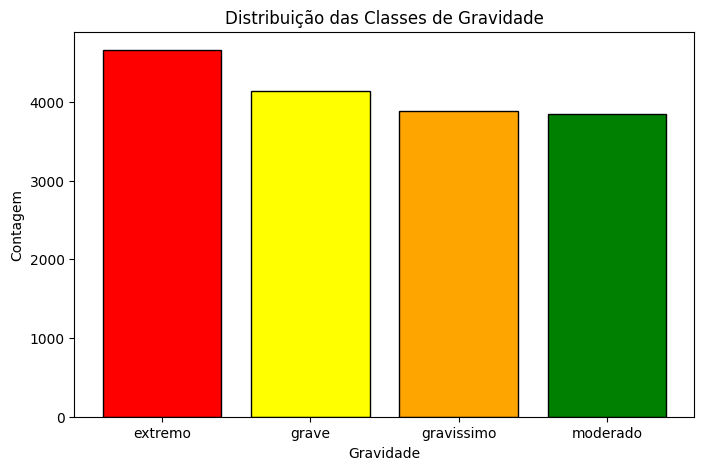

In [ ]:
# Verificação da distribuição das classes na variável 'gravidade'
gravidade_counts = df_final['gravidade'].value_counts()
print("\nDistribuição das classes em 'gravidade':")
print(gravidade_counts)

# Plot utilizando matplotlib para visualizar a distribuição
plt.figure(figsize=(8,5))
colors = ['red','yellow', 'orange', 'green']
plt.bar(gravidade_counts.index, gravidade_counts.values, color=colors, edgecolor= 'black')
plt.xlabel('Gravidade')
plt.ylabel('Contagem')
plt.title('Distribuição das Classes de Gravidade')
plt.show()




---



In [ ]:
# Definindo a variável-alvo
y = df_final['gravidade']

# Selecionando as features: removendo identificadores e a pontuação (já que a gravidade foi derivada dela)
features = ['escolaridade', 'idade', 'cidade', 'qtd_dependentes', 'qtd_filhos_18_def',
            'genero', 'qtd_form_respondido', 'reside_agressor', 'filhos_deficientes',
            'aumento_agressoes', 'cor_raca', 'percepcao_risco', 'medicacao_controlada',
            'conflito_guarda', 'risco_suicidio', 'acomp_psicologico',
            'agr_descumpriu_medida', 'agr_dificuldade_financeira', 'agr_uso_substancias',
            'agr_ameaçou_terceiros', 'agr_ameaca_pessoal', 'agr_violencia_sexual',
            'agr_suicidio', 'agr_acesso_arma', 'agr_controle_ciume',
            'agr_doenca_mental', 'situacao_moradia', 'novo_relacionamento',
            'filhos_presenciaram', 'esgotamento_emocional', 'local_risco', 'gravidez_recente',
            'ocorrencia_policia', 'atendimento_medico', 'deficiencia', 'aceita_abrigamento',
            'dependencia_financeira', 'separacao', 'violencia_gravidez', 'tem_filhos']

X = df_final[features].copy()

In [ ]:
# Dividindo os conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # Ideal usar stratify em problemas de classificação
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((13217, 40), (3305, 40), (13217,), (3305,))

# **Etapa 3: Análise Inicial dos Dados**

## **Atividade (3.a): Caracterização dos Dados**

* Utilizar estatísticas descritivas e análise multivariada para identificar padrões iniciais.

In [ ]:
# Estatísticas descritivas para variáveis numéricas e categóricas
print("Estatísticas descritivas - Variáveis Numéricas:")
df_final.describe()

Estatísticas descritivas - Variáveis Numéricas:


,Formulario,Vitima,idade,qtd_dependentes,qtd_filhos_18_def,qtd_form_respondido,pont_total_form
count,16522.000000,16522.000000,16522.000000,16522.000000,16522.000000,16522.000000,16522.000000
mean,8333.213957,8326.240286,35.023968,1.002421,1.500908,1.092725,17.253601
std,4770.130113,4741.483293,1.716667,0.077763,0.052759,0.326015,7.293120
min,1.000000,2.000000,12.000000,1.000000,1.000000,1.000000,1.000000
25%,4203.250000,4233.250000,35.000000,1.000000,1.500000,1.000000,12.000000
50%,8333.500000,8287.000000,35.000000,1.000000,1.500000,1.000000,17.000000
75%,12463.750000,12415.000000,35.000000,1.000000,1.500000,1.000000,22.000000
max,16594.000000,16613.000000,81.000000,6.000000,4.000000,5.000000,37.000000


In [ ]:
print("\nEstatísticas descritivas - Variáveis Categóricas:")
df_final.describe(include='object')


Estatísticas descritivas - Variáveis Categóricas:


,escolaridade,cidade,genero,reside_agressor,filhos_deficientes,aumento_agressoes,cor_raca,percepcao_risco,medicacao_controlada,conflito_guarda,...,gravidez_recente,ocorrencia_policia,atendimento_medico,deficiencia,aceita_abrigamento,dependencia_financeira,separacao,violencia_gravidez,tem_filhos,gravidade
count,16522,16522,16522,16522,16522,16522,16522,16522,16522,16522,...,16522,16522,16522,16522,16522,16522,16522,16522,16522,16522
unique,7,12,1,2,2,2,7,4,2,2,...,2,2,2,4,2,2,2,2,2,4
top,Fundamental incompleto,Fortaleza,F,Sim,Não,Sim,Parda,Sim,Não,Não,...,Não,Não,Não,Não,Não,Não,Sim,Não,Sim,extremo
freq,16342,11542,16522,13709,14475,13366,11434,15939,14922,11140,...,14744,11867,13956,14548,16143,13397,12211,10656,13221,4659


In [ ]:
# Retirando as colunas com identificadores
colunas_excluir = ['Formulario', 'Vitima']
numeric_cols_filtradas = [col for col in numeric_cols if col not in colunas_excluir]

In [ ]:
# Análise de correlação entre variáveis numéricas
correlation_matrix = df_final[numeric_cols_filtradas].corr()
print("\nMatriz de Correlação:")
print(correlation_matrix)


Matriz de Correlação:
                        idade  qtd_dependentes  qtd_filhos_18_def  \
idade                1.000000         0.006820          -0.014943   
qtd_dependentes      0.006820         1.000000           0.840415   
qtd_filhos_18_def   -0.014943         0.840415           1.000000   
qtd_form_respondido  0.026528         0.005470          -0.026009   
pont_total_form     -0.030480        -0.003217          -0.002093   

                     qtd_form_respondido  pont_total_form  
idade                           0.026528        -0.030480  
qtd_dependentes                 0.005470        -0.003217  
qtd_filhos_18_def              -0.026009        -0.002093  
qtd_form_respondido             1.000000         0.083512  
pont_total_form                 0.083512         1.000000  


## **Atividade (3.b): Apresentação de Gráficos**

* Criar gráficos para facilitar a interpretação dos padrões nos dados.

In [ ]:
# Dicionário com os novos rótulos para as variáveis numéricas
numeric_labels = {
    'pont_total_form': 'Pontuação Total',
    'idade': 'Idade',
    'qtd_dependentes': 'Dependentes',
    'qtd_filhos_18_def': 'Filhos (>=18)',
    'qtd_form_respondido': 'Formulários Respondidos'
}

# Cria um DataFrame temporário com as colunas numéricas renomeadas para os gráficos
df_numeric_renamed = df_final[numeric_cols_filtradas].rename(columns=numeric_labels)

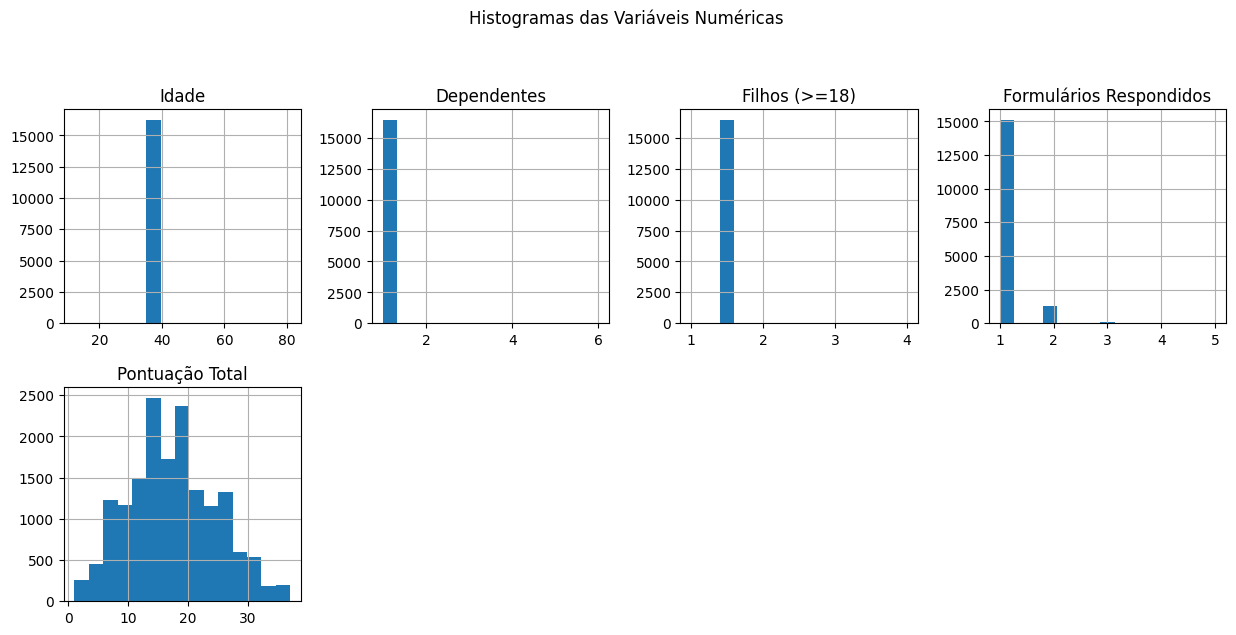

In [ ]:
df_numeric_renamed.hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle("Histogramas das Variáveis Numéricas")
plt.show()

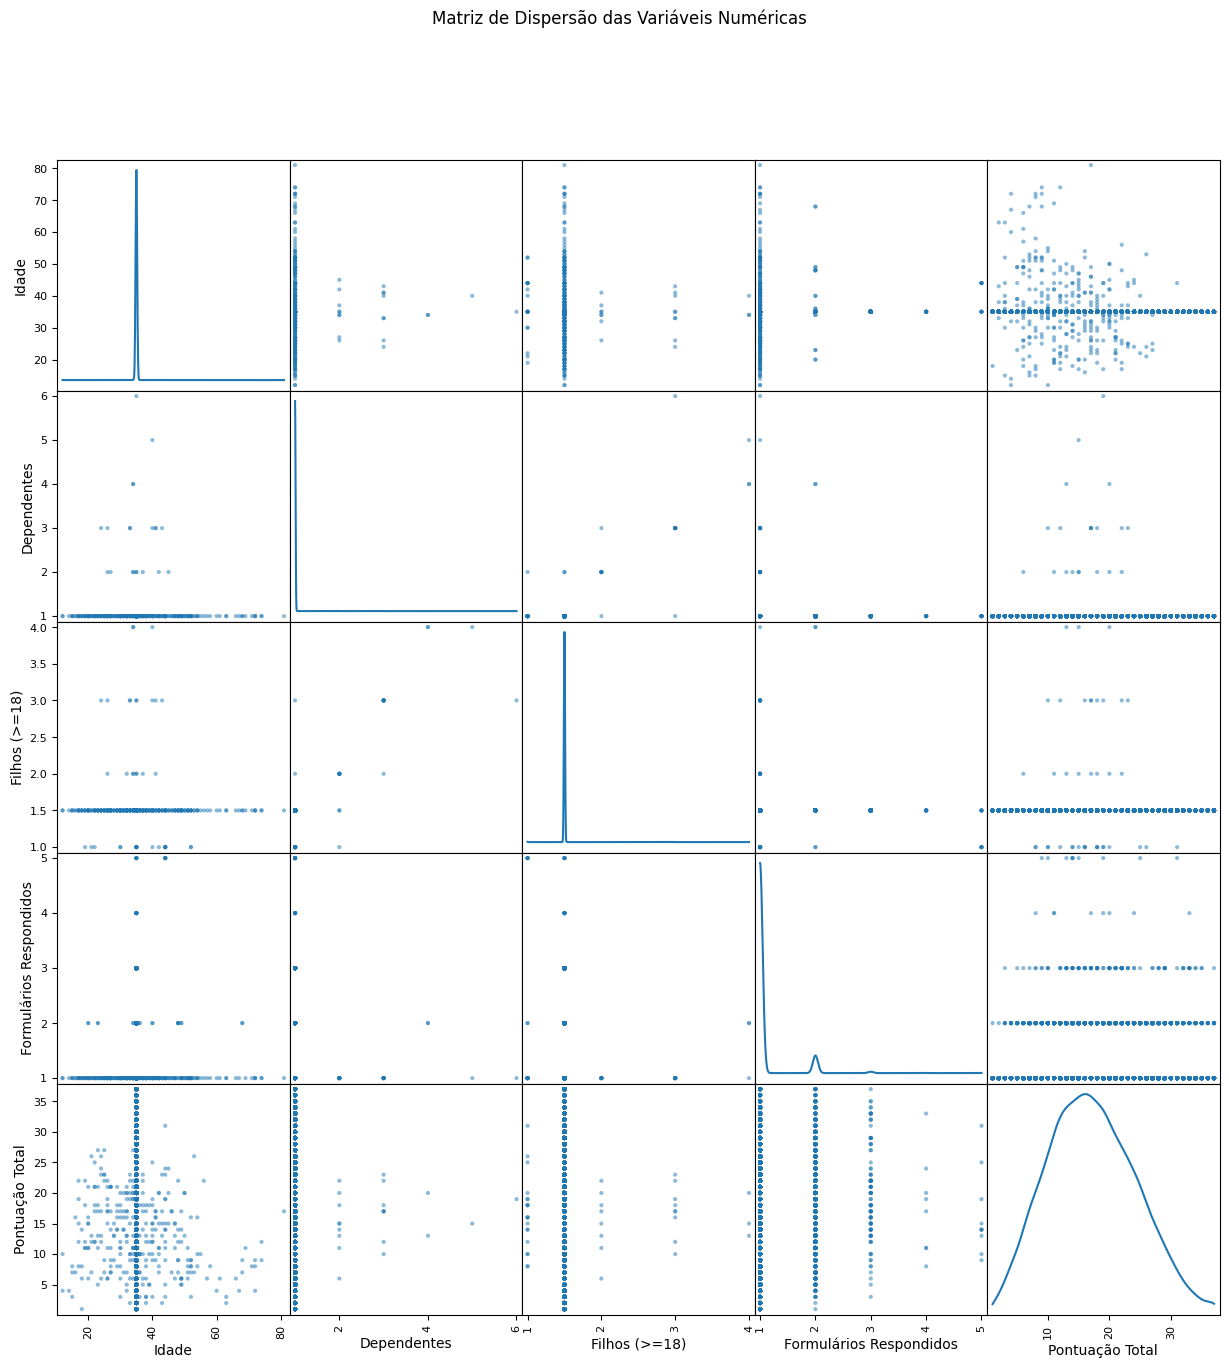

In [ ]:
# 2. Matriz de Dispersão (Scatter Matrix) para análise multivariada
pd.plotting.scatter_matrix(df_numeric_renamed, figsize=(15, 15), diagonal='kde')
plt.suptitle("Matriz de Dispersão das Variáveis Numéricas")
plt.show()

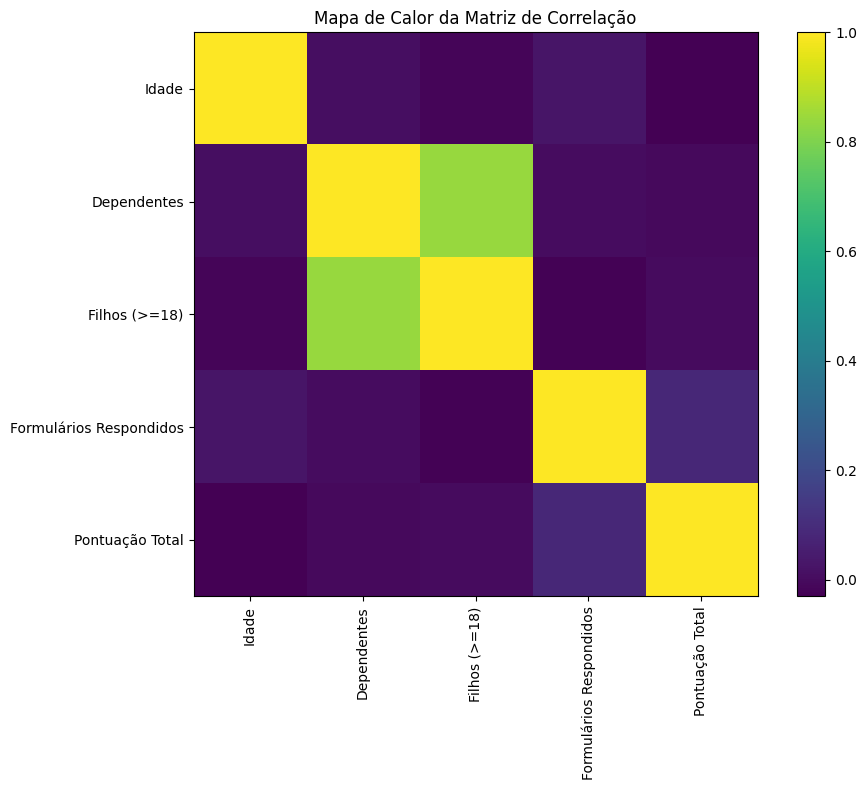

In [ ]:
# 3. Calcula a matriz de correlação com as variáveis numéricas originais
correlation_matrix = df_final[numeric_cols_filtradas].corr()

plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='viridis', interpolation='none')
plt.colorbar()

# Atualiza os rótulos do eixo com os novos nomes definidos
new_labels = [numeric_labels.get(col, col) for col in correlation_matrix.columns]
plt.xticks(range(len(new_labels)), new_labels, rotation=90)
plt.yticks(range(len(new_labels)), new_labels)

plt.title("Mapa de Calor da Matriz de Correlação")
plt.tight_layout()
plt.show()

<ipython-input-98-946ce51ea629>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_final[col] for col in numeric_cols_filtradas], labels=numeric_cols_filtradas, showfliers=True)


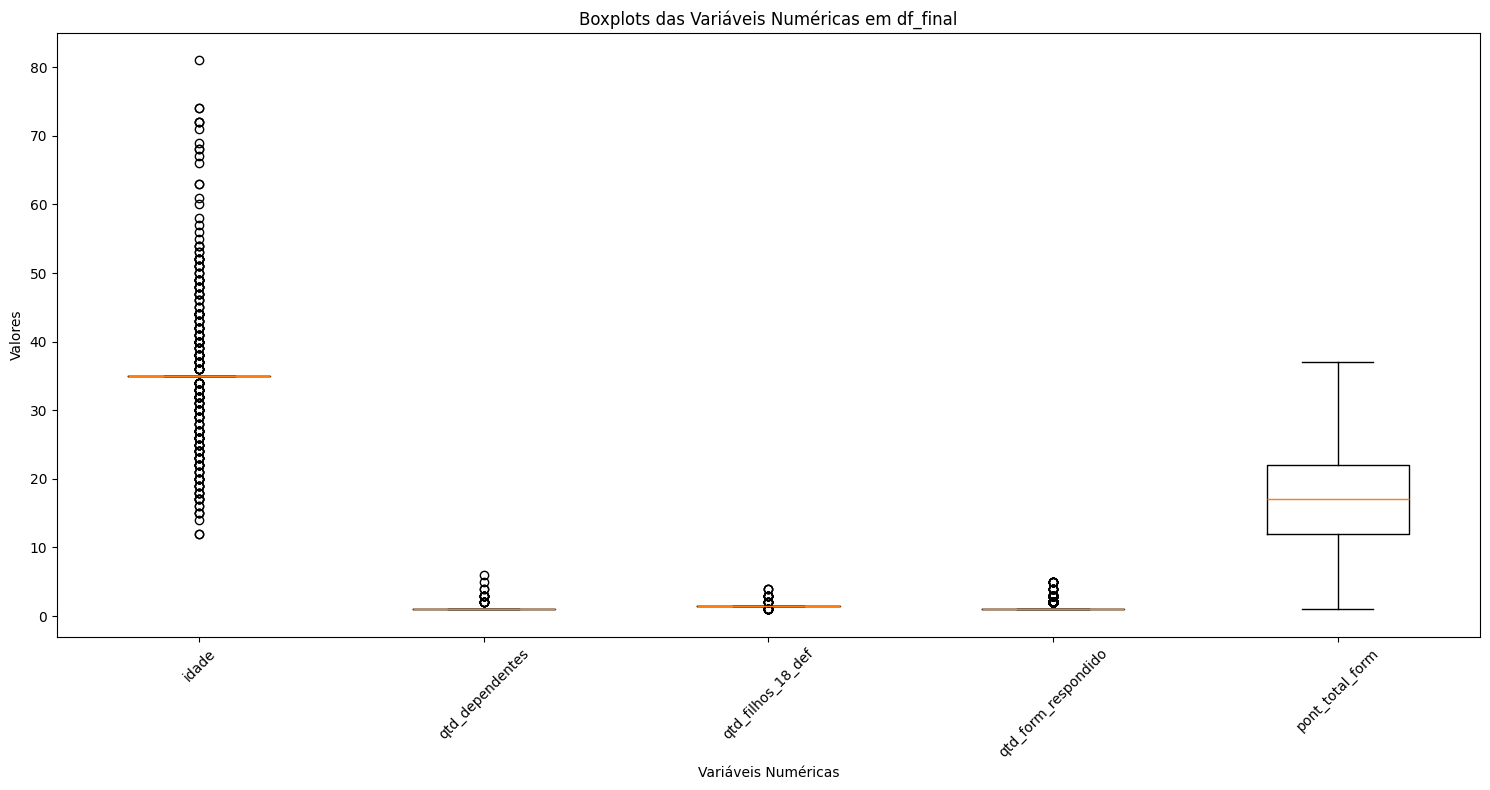

In [ ]:
plt.figure(figsize=(15, 8))
# Cria um boxplot para cada variável numérica
plt.boxplot([df_final[col] for col in numeric_cols_filtradas], labels=numeric_cols_filtradas, showfliers=True)
plt.title("Boxplots das Variáveis Numéricas em df_final")
plt.xlabel("Variáveis Numéricas")
plt.ylabel("Valores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

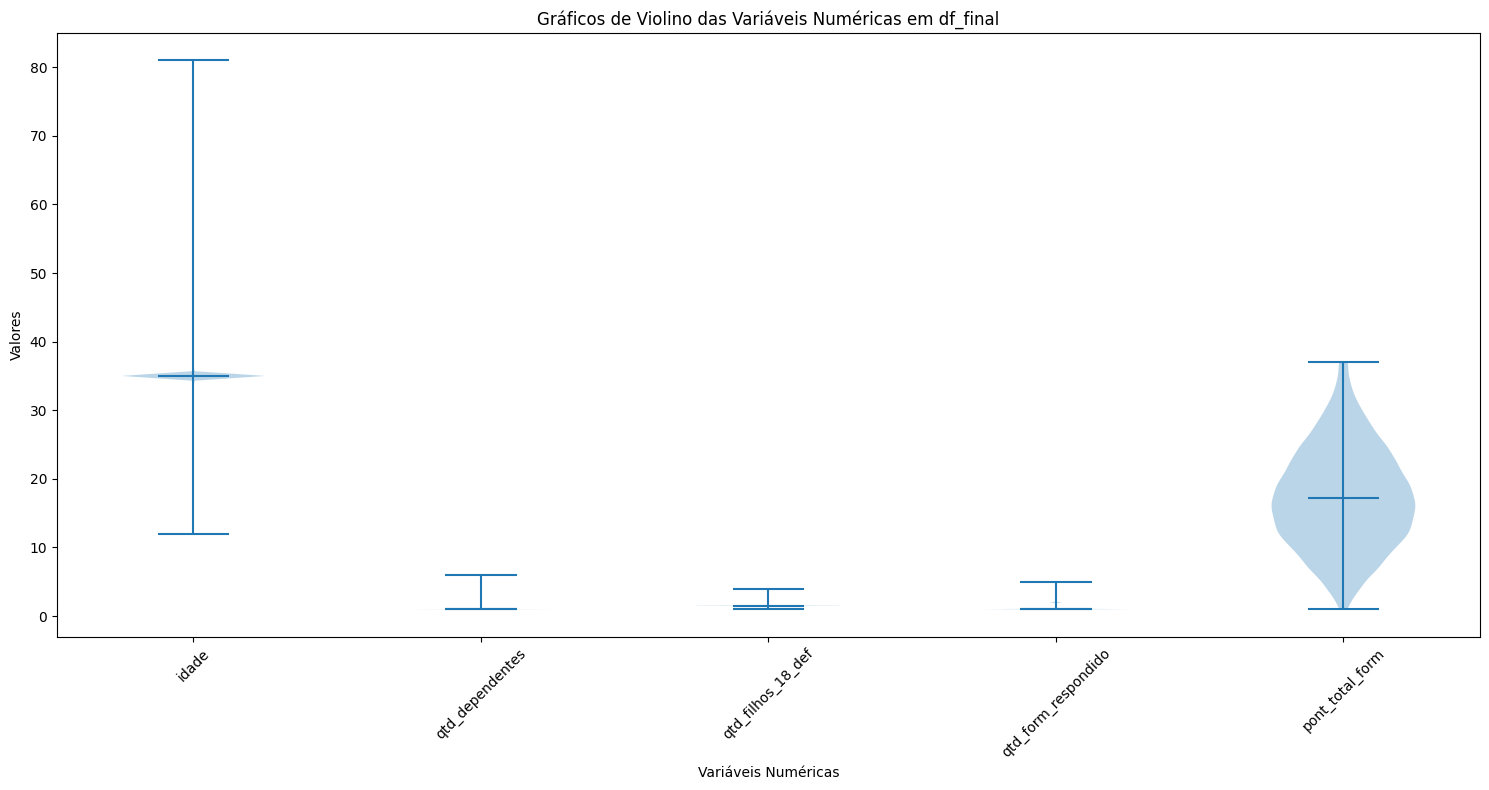

In [ ]:
plt.figure(figsize=(15, 8))
# Cria um gráfico de violino para cada variável numérica
plt.violinplot([df_final[col] for col in numeric_cols_filtradas], showmeans=True)
# Configura os rótulos do eixo x
plt.xticks(ticks=range(1, len(numeric_cols_filtradas) + 1), labels=numeric_cols_filtradas, rotation=45)
plt.title("Gráficos de Violino das Variáveis Numéricas em df_final")
plt.xlabel("Variáveis Numéricas")
plt.ylabel("Valores")
plt.tight_layout()
plt.show()

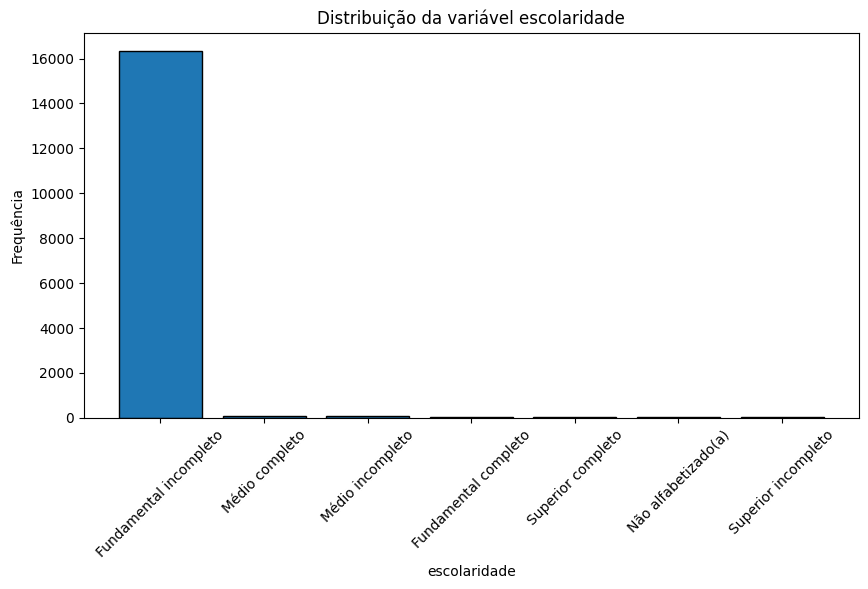

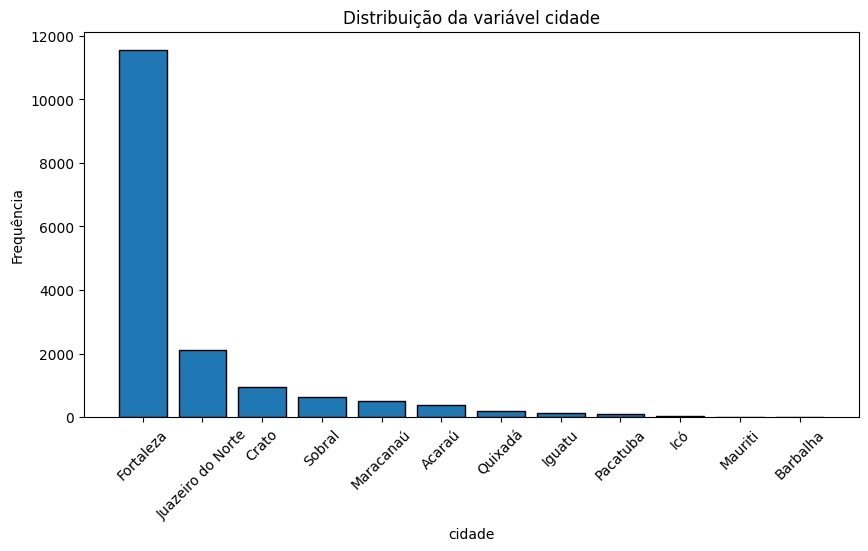

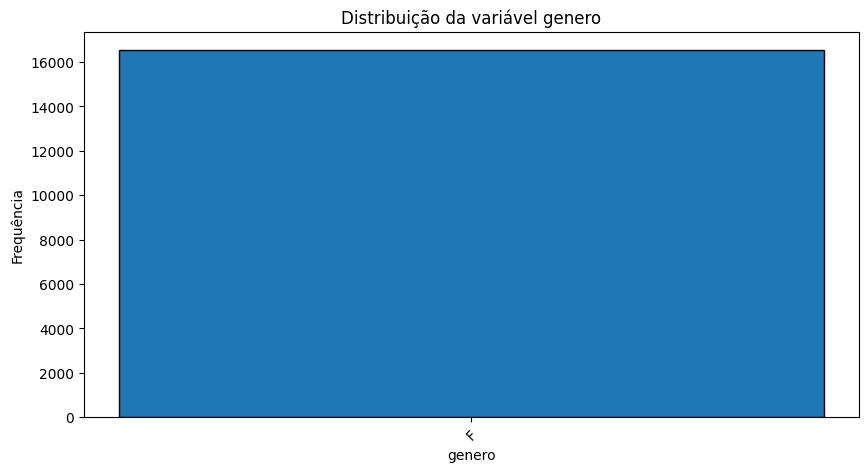

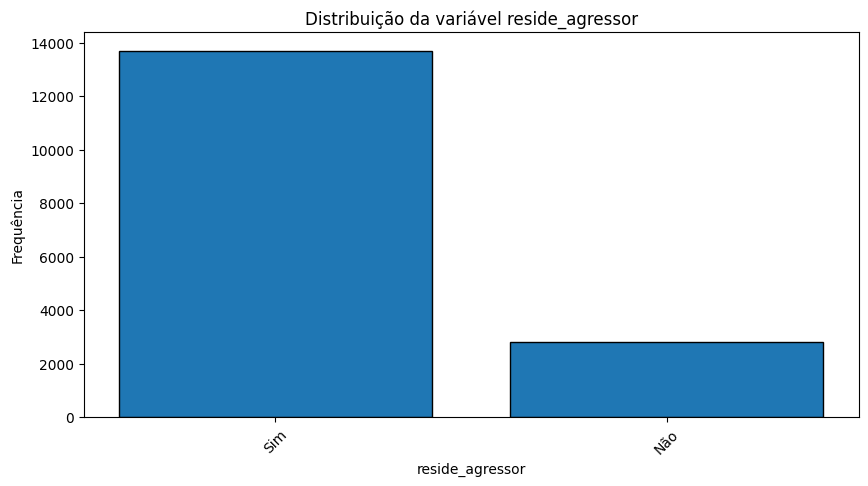

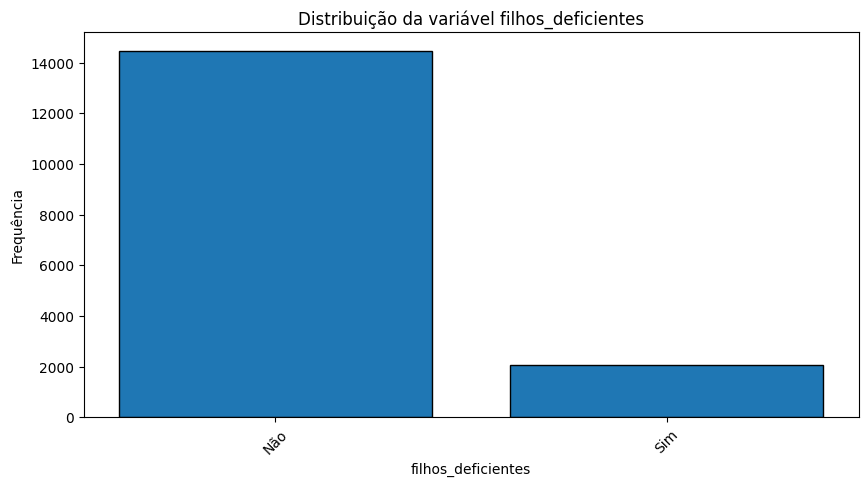

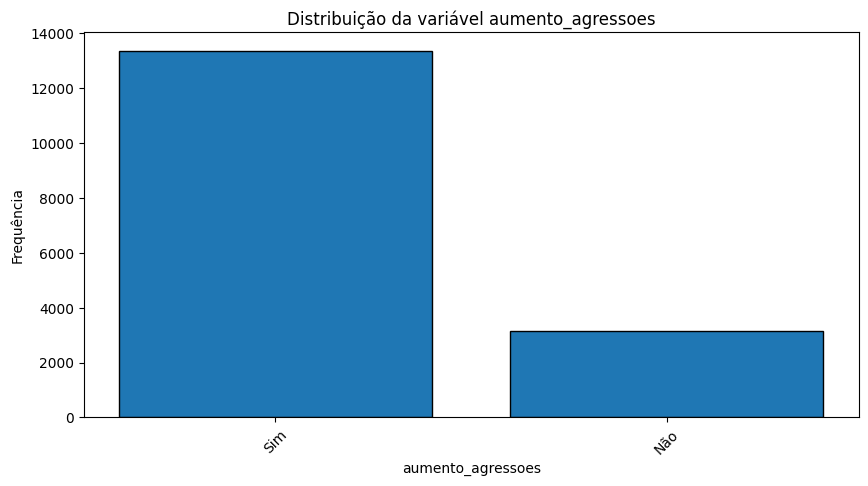

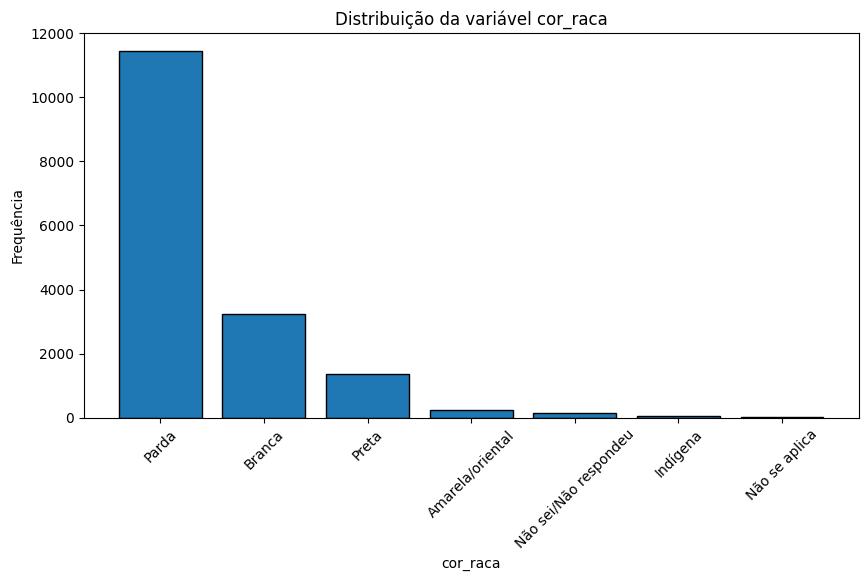

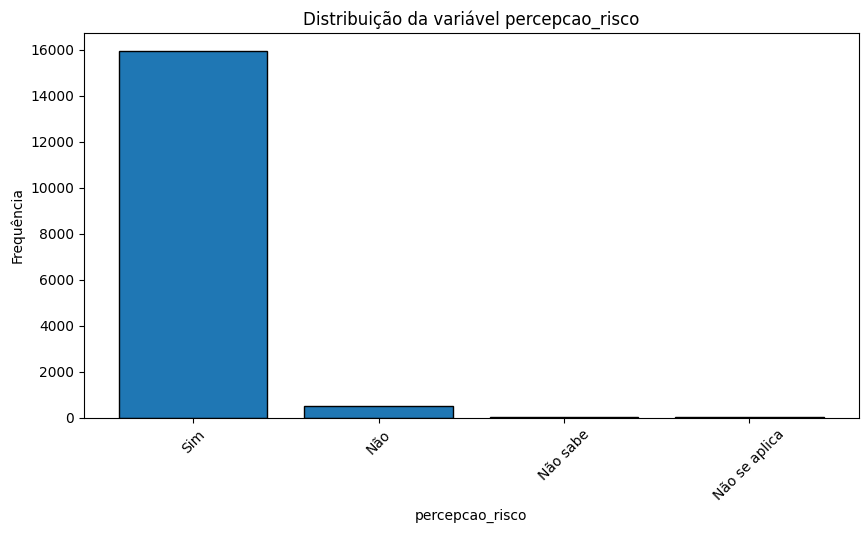

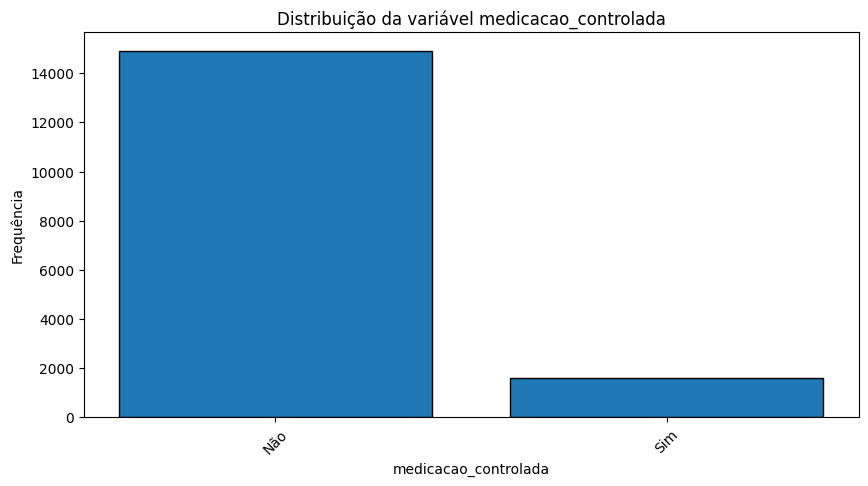

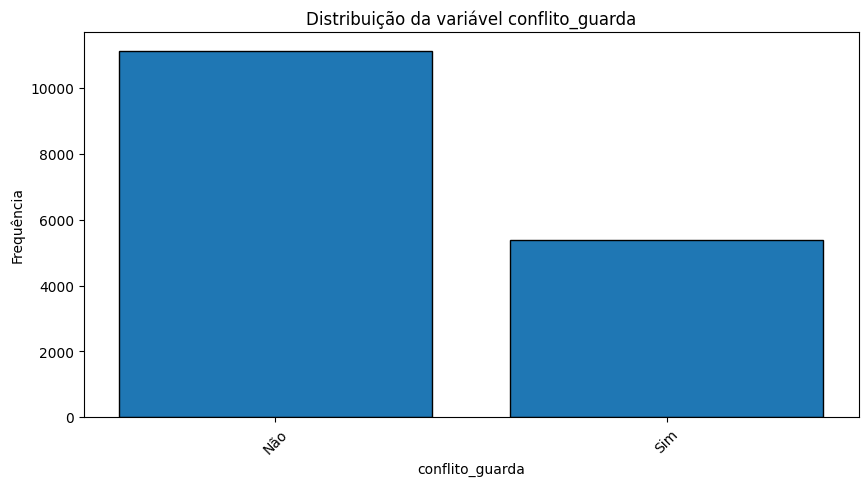

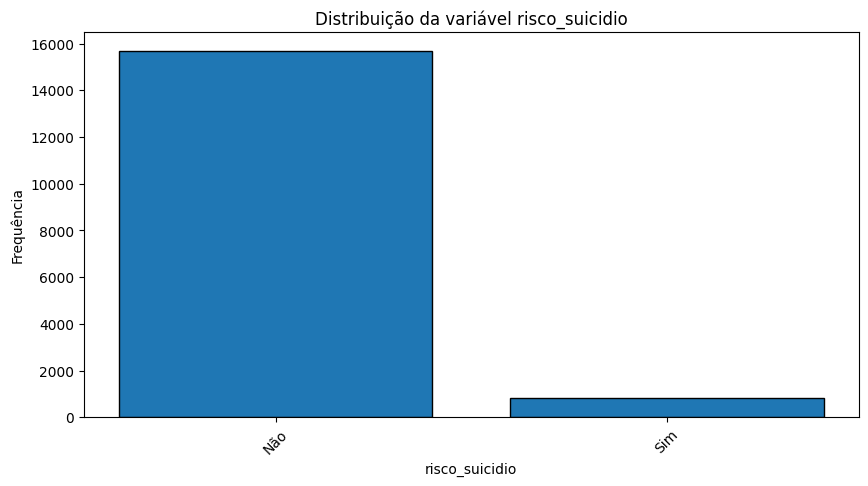

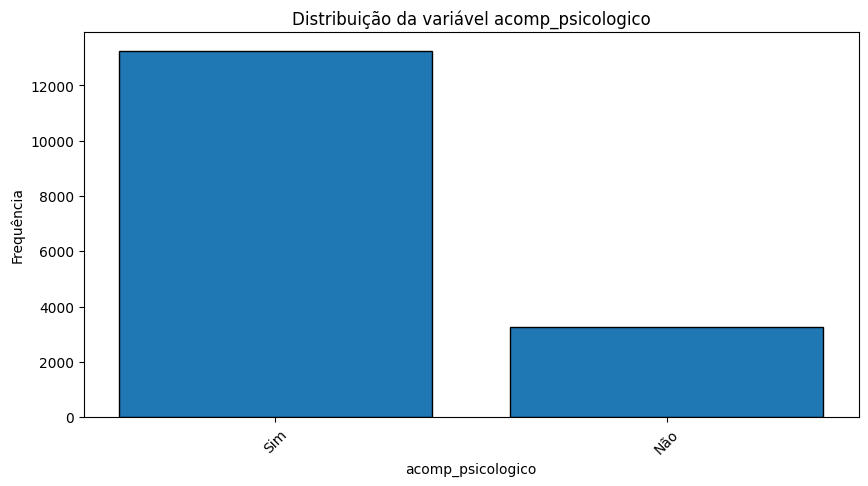

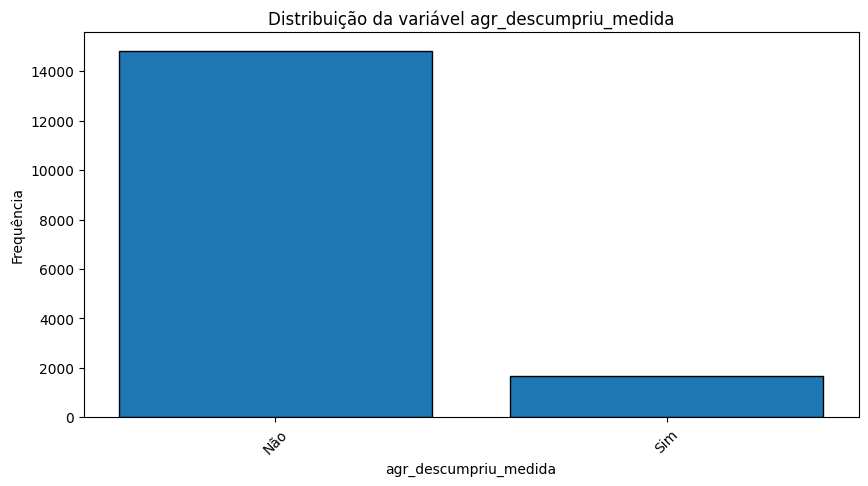

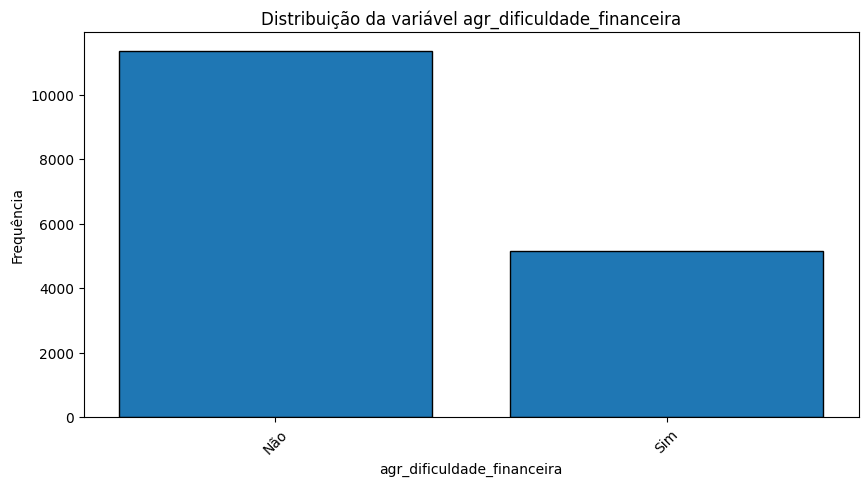

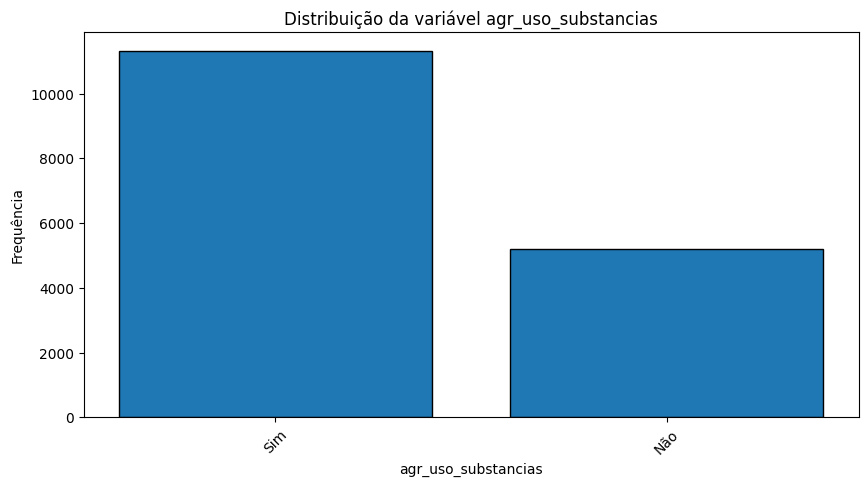

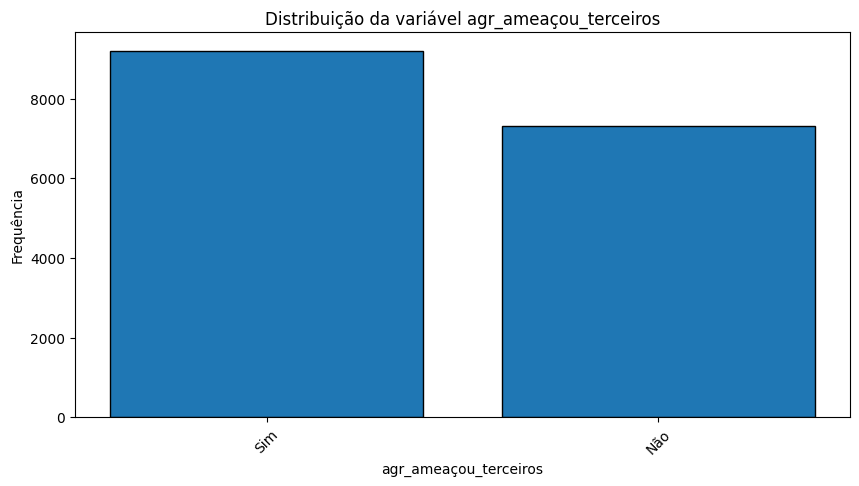

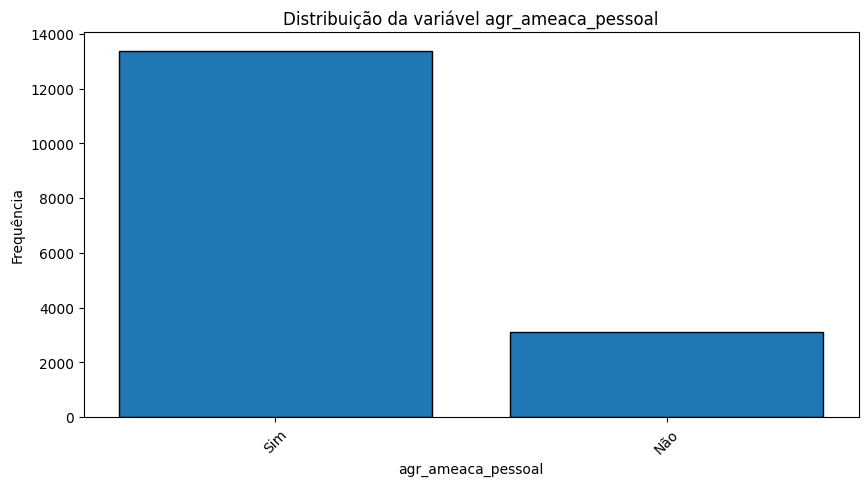

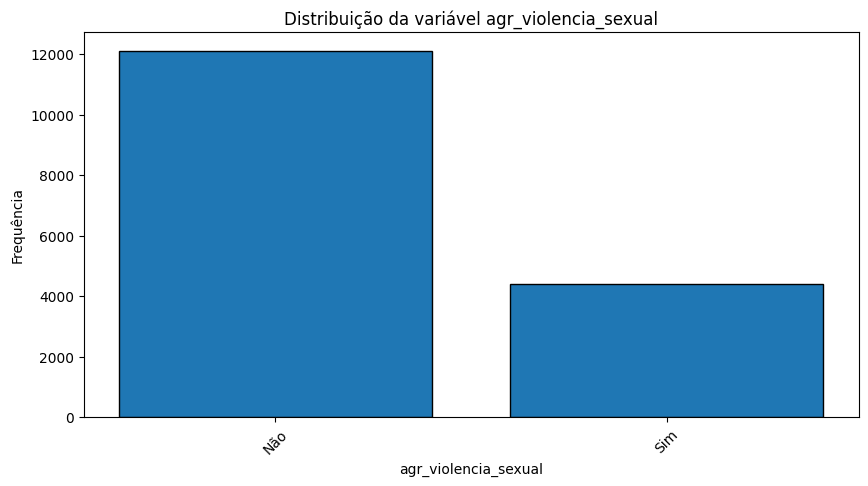

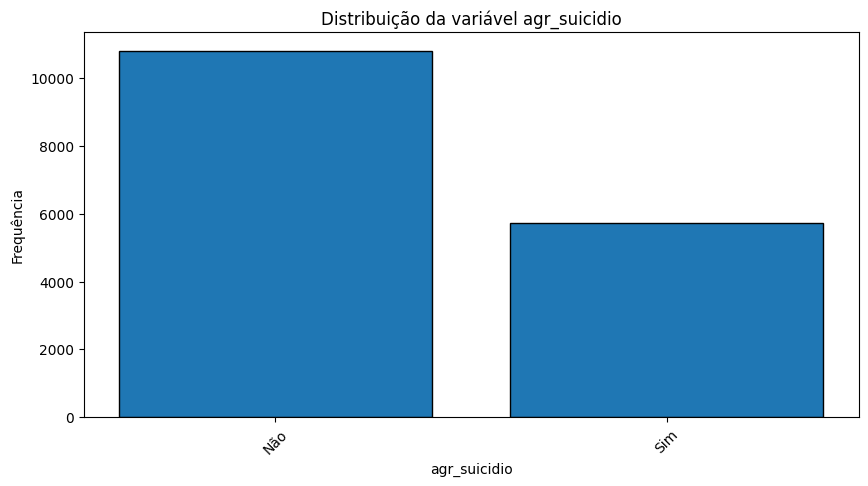

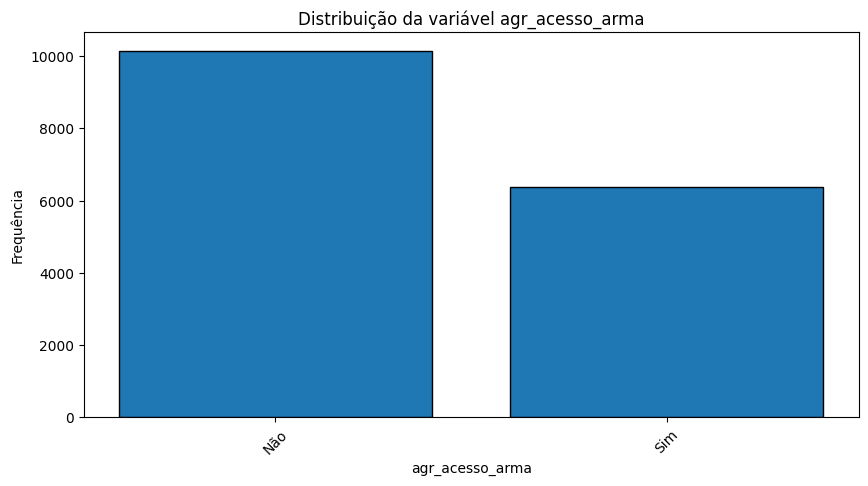

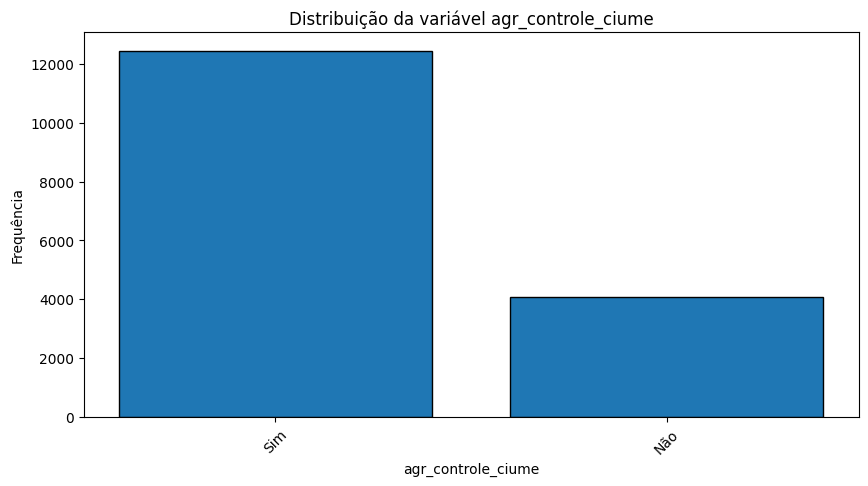

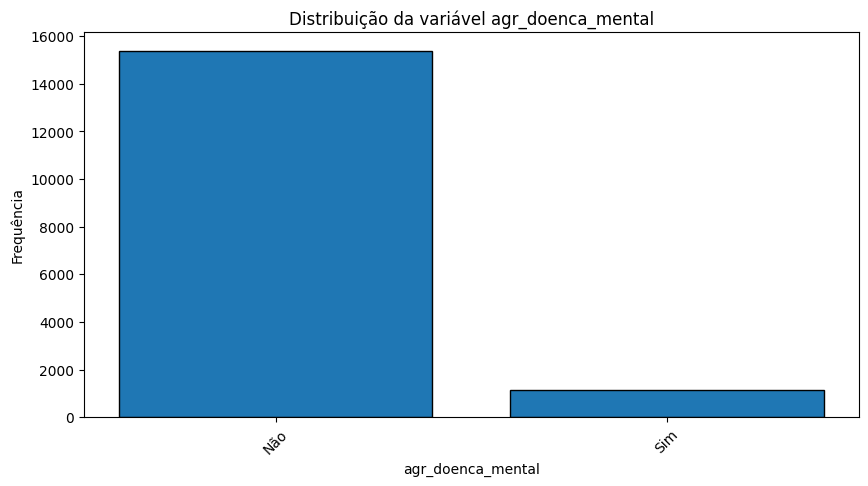

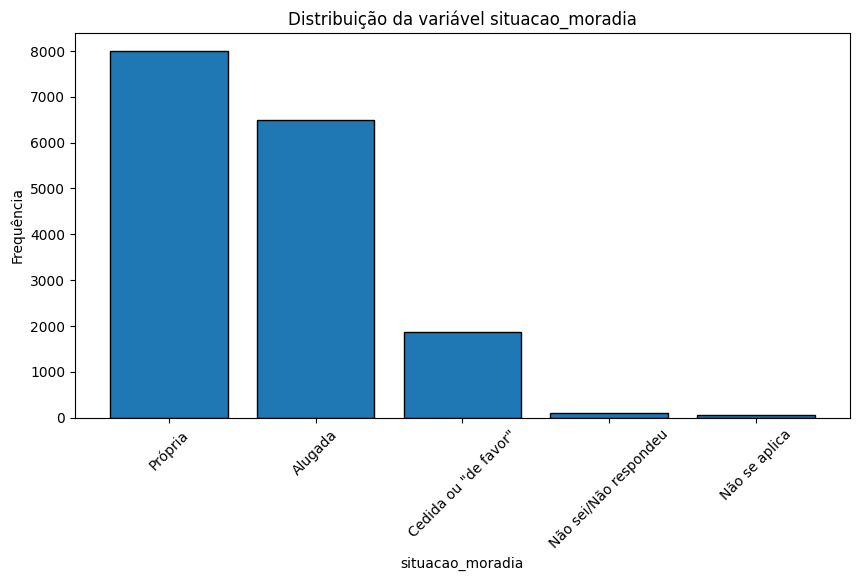

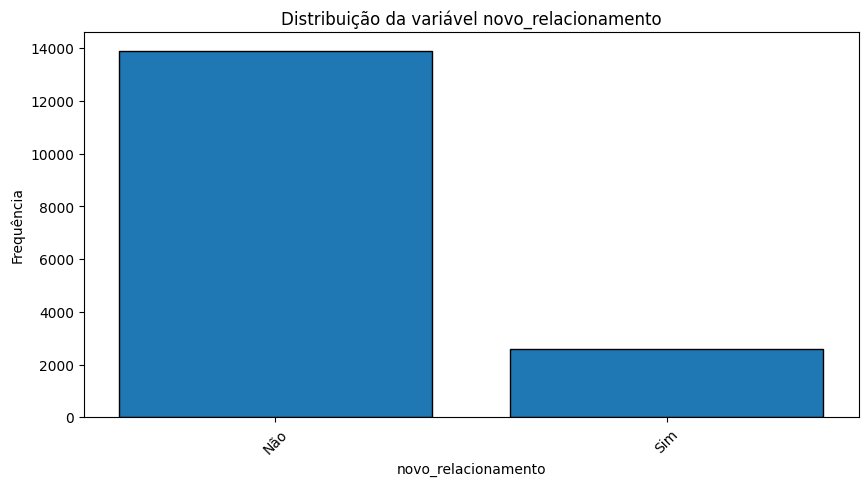

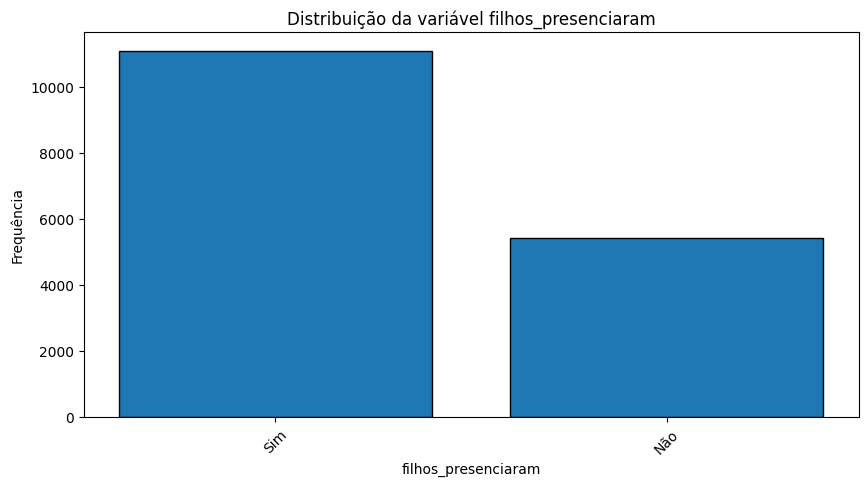

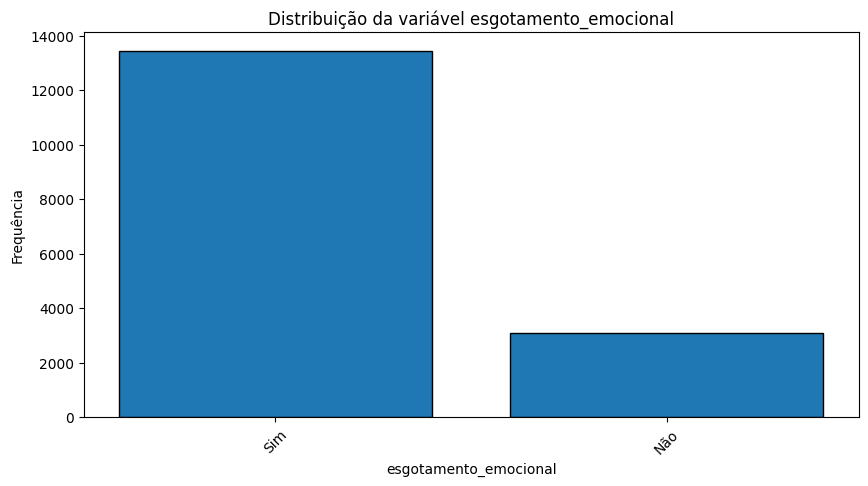

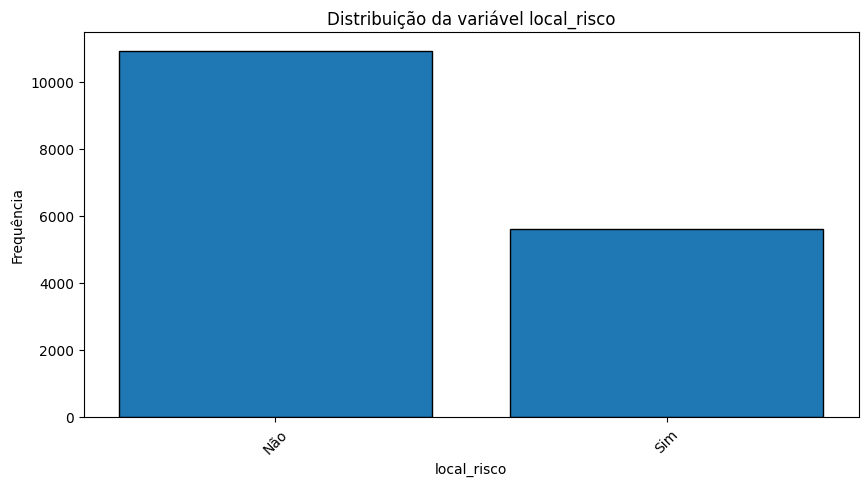

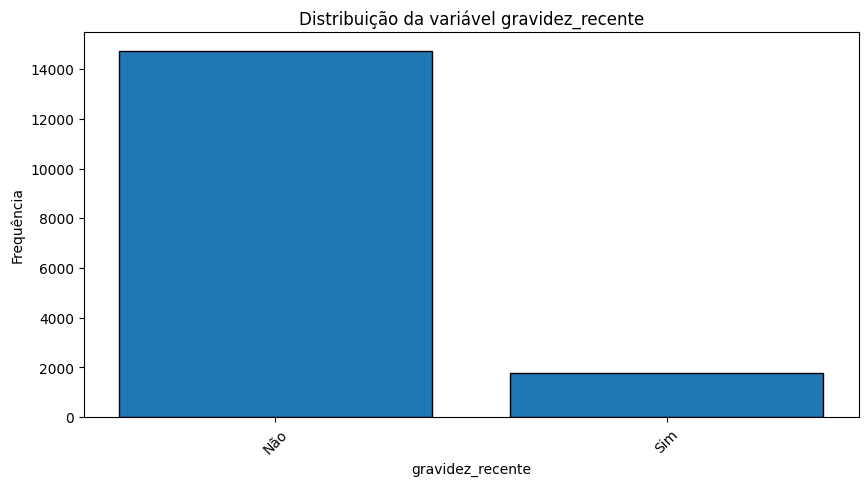

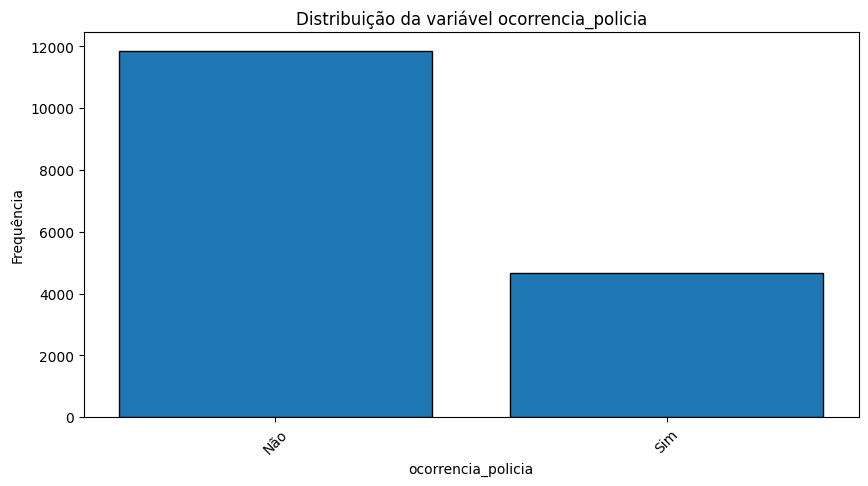

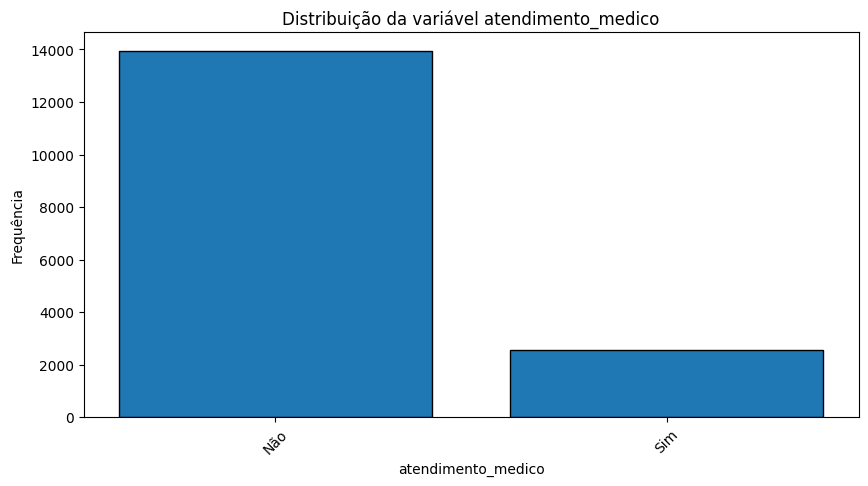

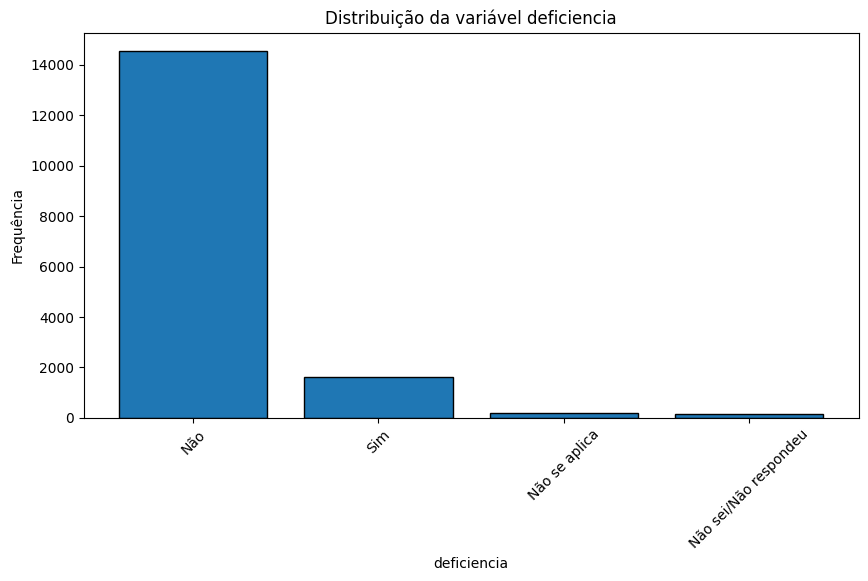

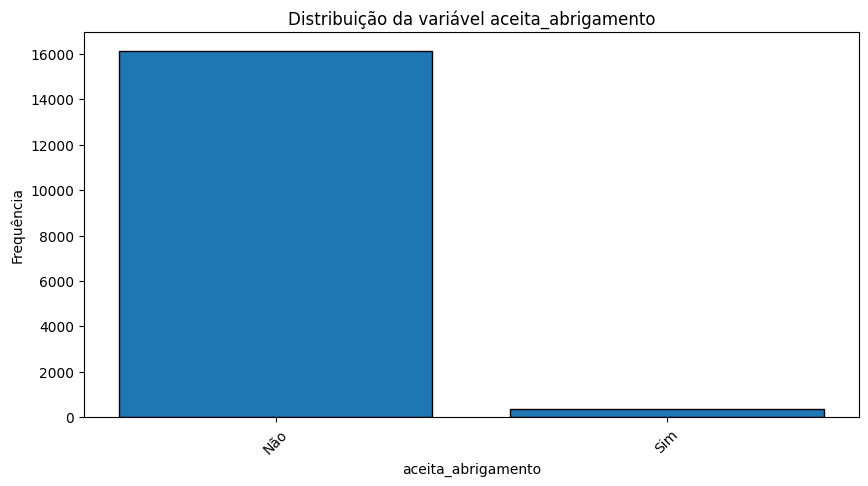

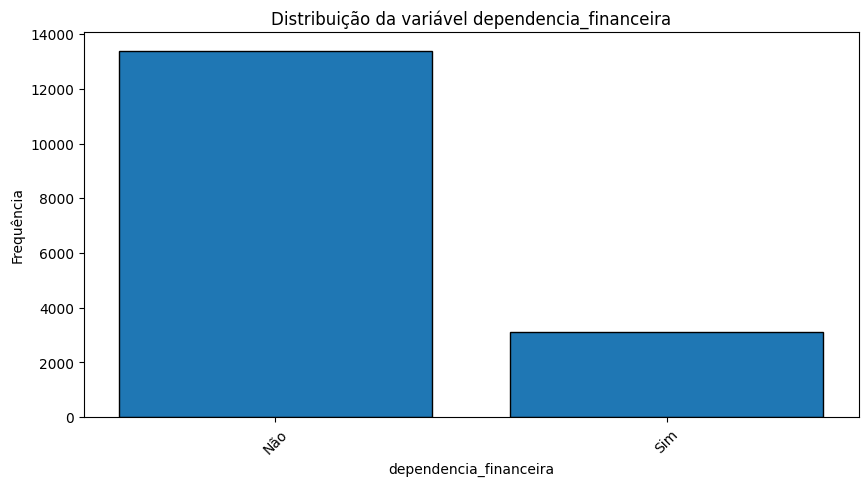

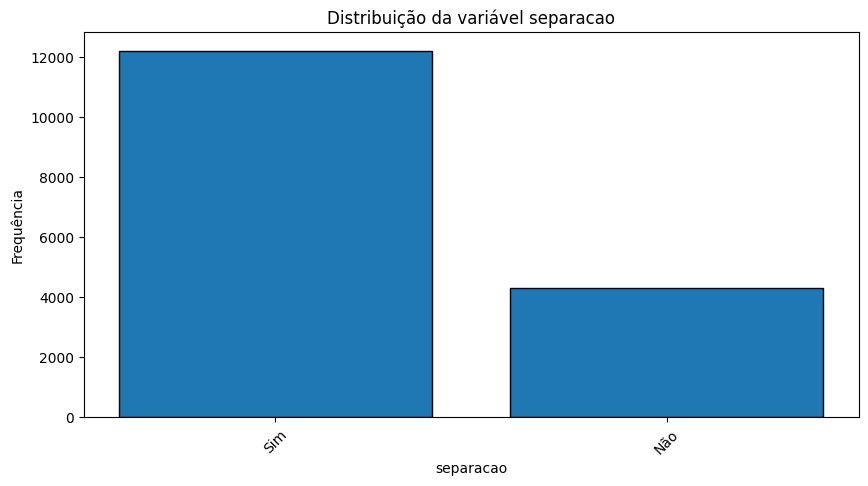

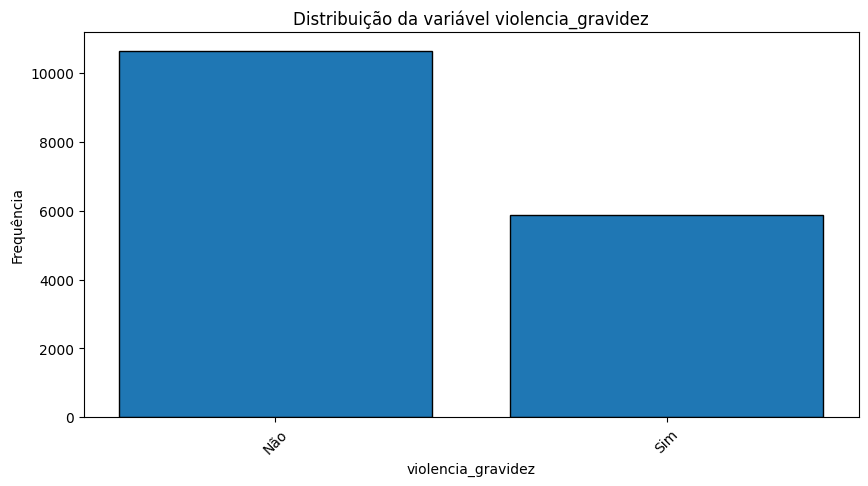

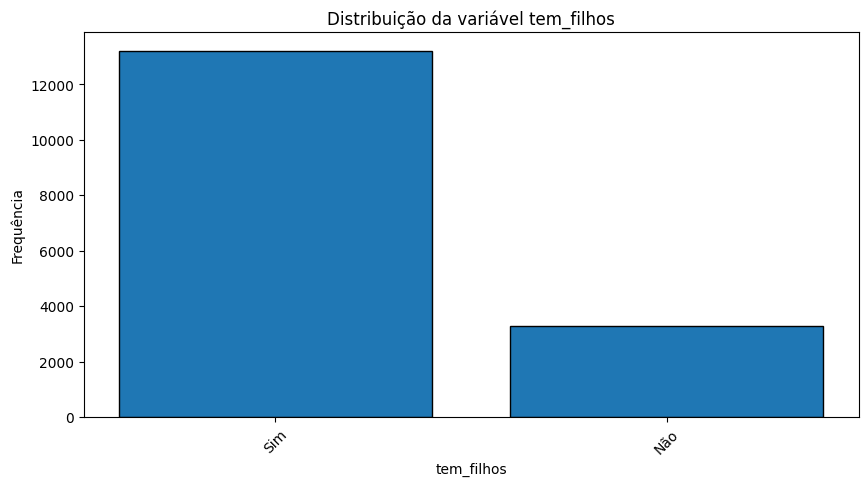

In [ ]:
# Seleciona as variáveis categóricas dentre as features
categorical_features = X.select_dtypes(include='object').columns.tolist()
# Loop para criar gráficos para cada variável categórica
for col in categorical_features:
    counts = df_final[col].value_counts()  # Conta as ocorrências de cada categoria
    plt.figure(figsize=(10, 5))
    plt.bar(counts.index, counts.values, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.title(f'Distribuição da variável {col}')
    plt.xticks(rotation=45)
    plt.show()

## **Atividade (3.c): Resumo das Descobertas**
* Destacar os principais achados e potenciais vieses presentes nos dados.

Resumo das Descobertas:
1. Estatísticas Descritivas:
  - As variáveis numéricas exibem diferentes escalas e dispersões.
  - Algumas distribuições apresentam assimetrias ou concentrações de valores, evidenciadas nos histogramas.
  - A imputação dos dados faltantes (mediana para numéricas e moda para categóricas) pode introduzir vieses, sobretudo se a distribuição original for fortemente assimétrica.

2. Análise Multivariada:
  - A matriz de correlação revela relações significativas entre determinadas variáveis, indicando possíveis padrões (por exemplo, variáveis relacionadas à pontuação e aspectos demográficos podem estar correlacionadas).
  - A matriz de dispersão possibilita visualizar relações bivariadas, ajudando na identificação de agrupamentos ou tendências entre as variáveis numéricas.

3. Gráficos:
  - Os histogramas fornecem uma visão clara da distribuição dos dados, facilitando a identificação de possíveis outliers e assimetrias.
  - O mapa de calor da correlação destaca visualmente as variáveis que possuem alta correlação, o que pode ser útil para reduzir a dimensionalidade em análises futuras.
  - A análise visual reforça a necessidade de investigações mais profundas sobre possíveis vieses decorrentes da agregação de dados oriundos de diferentes planilhas e da forma de imputação dos valores ausentes.


# **Etapa 4: Construção e Avaliação dos Modelos**

## **Atividade (4.a): Definição das Tarefas de Predição e Classificação**
* Identificar quais problemas podem ser resolvidos com modelos de regressão,
classificação ou clusterização.

### a) Definição das Tarefas de Predição e Classificação

-   **Problema de Classificação**:\
    Dada a variável-alvo `gravidade`, que pode assumir quatro classes (`moderado`, `grave`, `gravissimo` e `extremo`), trata-se de **um problema de classificação multiclasse**.\
    O objetivo é, a partir das variáveis preditoras (socioeconômicas, comportamentais, histórico de violência, etc.), **prever o nível de gravidade** associado à vítima.

-   **Possíveis problemas de Regressão**:\
    Caso fosse de interesse prever o valor exato da pontuação (`pont_total_form`), poderíamos configurar esse problema como de **regressão**. Entretanto, neste projeto o foco está em **classificar** faixas de gravidade.

-   **Possíveis problemas de Clusterização**:\
    Poderia ser interessante agrupar vítimas com padrões de respostas semelhantes (por exemplo, usando K-Means), para entender perfis de risco sem rótulos. Porém, nossa tarefa principal aqui é **supervisionada (classificação)**, pois já possuímos o rótulo de gravidade.

## **Atividade (4.b): Treinamento de Modelos de Aprendizado de Máquina**
* Testar pelo menos três algoritmos de aprendizado supervisionado e/ou não
supervisionado.
* Justificar a escolha dos modelos.

Serão testados **três algoritmos de classificação supervisionada**:

1.  **Regressão Logística**
    -   Modelo linear, fácil de interpretar, bom como baseline.
2.  **Random Forest**
    -   Conjunto de múltiplas árvores de decisão; frequentemente obtém bom desempenho em diferentes cenários; lida bem com dados mistos (categóricos e numéricos).
3.  **Support Vector Machine (SVC)**
    -   Modelo robusto em problemas de classificação, capaz de lidar com margens de decisão complexas. Pode funcionar bem em datasets de dimensões médias.

In [ ]:
# Identificar colunas numéricas e categóricas
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

In [ ]:
# Criar transformadores
# -------------------------------
# Para as numéricas, usaremos StandardScaler
# Para as categóricas, usaremos OneHotEncoder (drop='first' ou não, a critério)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criação do ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
# Label Encoding na variável-alvo
# -------------------------------
# Como 'gravidade' é multiclasse, utilizaremos o LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
# Construir pipelines com diferentes algoritmos
# -------------------------------
# 1) Pipeline - Regressão Logística
pipe_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

# 2) Pipeline - Random Forest
pipe_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# 3) Pipeline - SVC
pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

In [ ]:
# Treinar cada modelo
pipe_logreg.fit(X_train, y_train_enc)
pipe_rf.fit(X_train, y_train_enc)
pipe_svc.fit(X_train, y_train_enc)

print("Modelos treinados com sucesso!")

Modelos treinados com sucesso!


**Justificativa dos modelos escolhidos**:

-   **Regressão Logística**: fornece uma linha de base sólida, interpretação mais simples dos coeficientes e rapidez no treinamento.
-   **Random Forest**: tende a ter bom desempenho em tarefas diversas, é robusto a valores discrepantes e a possíveis correlações entre variáveis.
-   **SVC**: bom para problemas de classificação em dimensões médias e pode capturar fronteiras complexas, ainda que seja geralmente mais custoso computacionalmente.

## **Atividade (4.c): Avaliação e Validação dos Modelos**
* Utilizar métricas como acurácia, precisão, recall, F1-score e AUC-ROC para avaliar
os modelos.
* Comparar desempenho dos modelos e sugerir melhorias.

**Métricas utilizadas**:

-   **Acurácia** (`accuracy_score`)
-   **Precisão** (`precision_score`)
-   **Recall** (`recall_score`)
-   **F1-score** (`f1_score`)
-   **AUC-ROC** multiclasse (usando estratégia One-vs-Rest ou One-vs-One)
-   **Matriz de classificação** (`classification_report`)

Para **AUC-ROC** em problemas multiclasse, o `roc_auc_score` requer que a saída seja a probabilidade das classes ou pontuações de decisão. Podemos calcular a AUC usando `multi_class='ovr'` ou `multi_class='ovo'`.

In [ ]:
# Função auxiliar para avaliar cada modelo
def avaliar_modelo(modelo, X_test, y_test_enc, nome_modelo, encoder_labels):
    """
    Esta função imprime as métricas de avaliação para um modelo já treinado.
    """
    # Predições das classes
    y_pred_enc = modelo.predict(X_test)
    # Probabilidades (necessário para AUC)
    # Alguns modelos (ex: SVC) precisam de probability=True para usar predict_proba
    y_prob = modelo.predict_proba(X_test)

    # Acurácia
    acc = accuracy_score(y_test_enc, y_pred_enc)
    # Precisão, Recall e F1 (macro ou weighted, pois é multiclasse)
    prec = precision_score(y_test_enc, y_pred_enc, average='weighted')
    rec = recall_score(y_test_enc, y_pred_enc, average='weighted')
    f1 = f1_score(y_test_enc, y_pred_enc, average='weighted')
    # AUC-ROC (One-vs-Rest)
    auc = roc_auc_score(y_test_enc, y_prob, multi_class='ovr')

    print(f"\n=== Avaliação do {nome_modelo} ===")
    print(f"Acurácia:  {acc:.4f}")
    print(f"Precisão:  {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc:.4f}")

    # Relatório de classificação (por classe)
    print("\nRelatório de Classificação:")
    print(classification_report(y_test_enc, y_pred_enc, target_names=encoder_labels))

In [ ]:
# Avaliar cada modelo
encoder_labels = le.inverse_transform([0,1,2,3])  # Para exibir o nome original das classes no classification_report

avaliar_modelo(pipe_logreg, X_test, y_test_enc, "Regressão Logística", encoder_labels)
avaliar_modelo(pipe_rf, X_test, y_test_enc, "Random Forest", encoder_labels)
avaliar_modelo(pipe_svc, X_test, y_test_enc, "SVC", encoder_labels)


=== Avaliação do Regressão Logística ===
Acurácia:  0.6339
Precisão:  0.6289
Recall:    0.6339
F1-score:  0.6306
AUC-ROC:   0.8705

Relatório de Classificação:
              precision    recall  f1-score   support

     extremo       0.74      0.79      0.77       932
       grave       0.51      0.54      0.53       827
  gravissimo       0.47      0.41      0.44       777
    moderado       0.77      0.77      0.77       769

    accuracy                           0.63      3305
   macro avg       0.63      0.63      0.63      3305
weighted avg       0.63      0.63      0.63      3305


=== Avaliação do Random Forest ===
Acurácia:  0.5876
Precisão:  0.5756
Recall:    0.5876
F1-score:  0.5805
AUC-ROC:   0.8367

Relatório de Classificação:
              precision    recall  f1-score   support

     extremo       0.69      0.74      0.72       932
       grave       0.48      0.46      0.47       827
  gravissimo       0.41      0.35      0.37       777
    moderado       0.71      0.7

Métricas de Avaliação dos Modelos:
                 Model  Accuracy  Precision    Recall  F1 Score   AUC-ROC
0  Logistic Regression  0.633888   0.628872  0.633888  0.630617  0.870539
1        Random Forest  0.587595   0.575640  0.587595  0.580459  0.836690
2                  SVC  0.630560   0.626156  0.630560  0.626887  0.867429


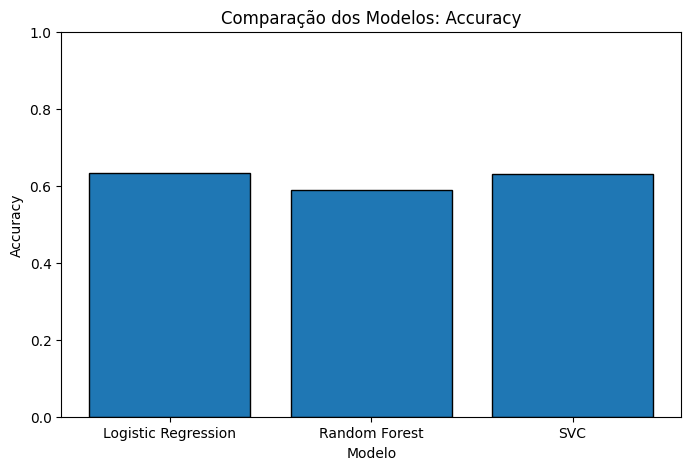

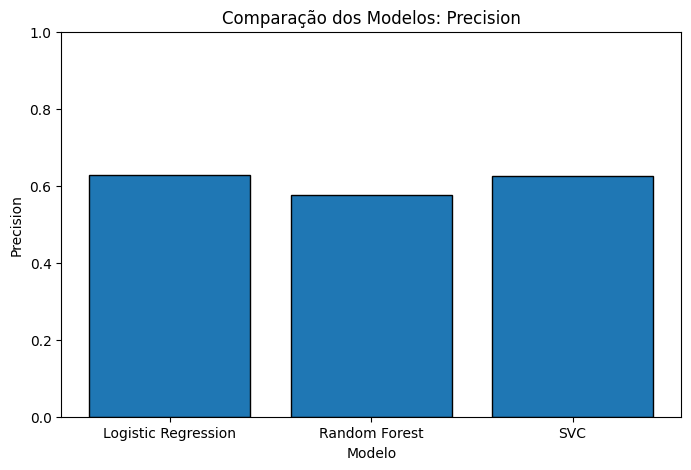

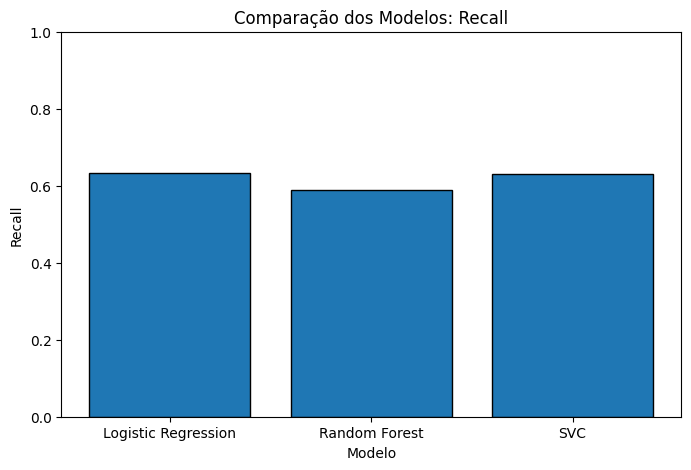

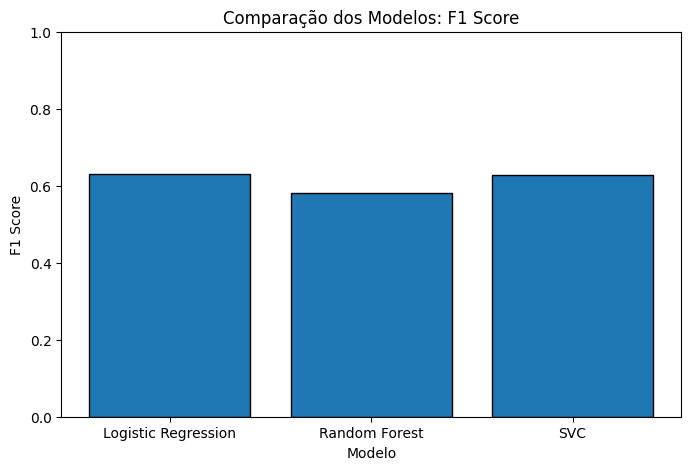

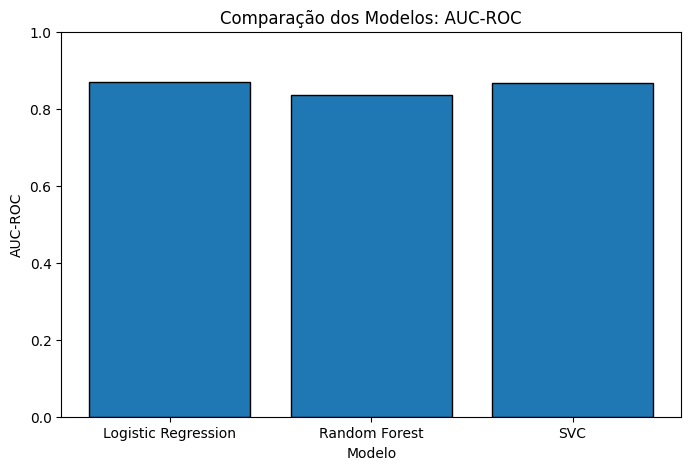

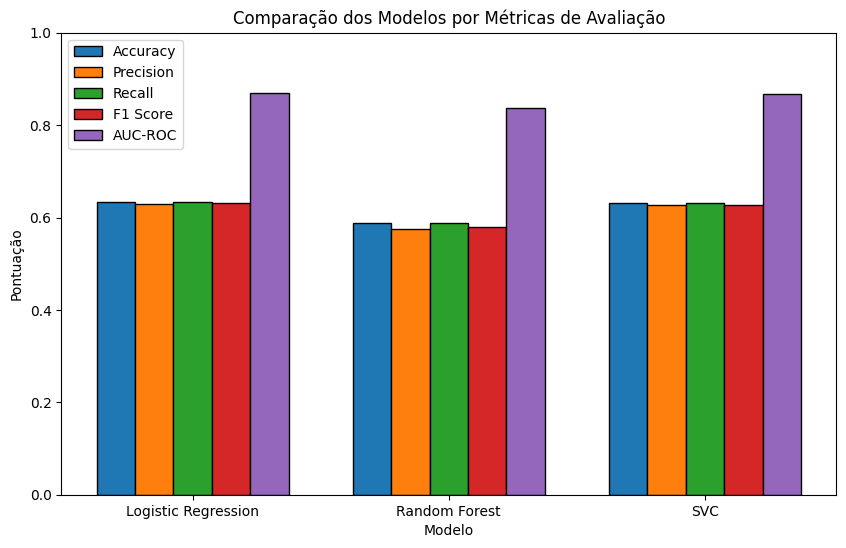

In [ ]:
# Função para calcular as métricas de avaliação para um modelo
def compute_metrics(model, X_test, y_test_enc):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    acc = accuracy_score(y_test_enc, y_pred)
    prec = precision_score(y_test_enc, y_pred, average='weighted')
    rec = recall_score(y_test_enc, y_pred, average='weighted')
    f1 = f1_score(y_test_enc, y_pred, average='weighted')
    auc = roc_auc_score(y_test_enc, y_prob, multi_class='ovr')
    return acc, prec, rec, f1, auc

# Calcula as métricas para cada modelo treinado
metrics_logreg = compute_metrics(pipe_logreg, X_test, y_test_enc)
metrics_rf = compute_metrics(pipe_rf, X_test, y_test_enc)
metrics_svc = compute_metrics(pipe_svc, X_test, y_test_enc)

# Armazena os resultados em um DataFrame
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVC'],
    'Accuracy': [metrics_logreg[0], metrics_rf[0], metrics_svc[0]],
    'Precision': [metrics_logreg[1], metrics_rf[1], metrics_svc[1]],
    'Recall': [metrics_logreg[2], metrics_rf[2], metrics_svc[2]],
    'F1 Score': [metrics_logreg[3], metrics_rf[3], metrics_svc[3]],
    'AUC-ROC': [metrics_logreg[4], metrics_rf[4], metrics_svc[4]]
}

df_results = pd.DataFrame(results)
print("Métricas de Avaliação dos Modelos:")
print(df_results)

# ----- Gráficos Individuais para cada métrica -----
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']

for metric in metric_names:
    plt.figure(figsize=(8, 5))
    plt.bar(df_results['Model'], df_results[metric], edgecolor='black')
    plt.title(f'Comparação dos Modelos: {metric}')
    plt.xlabel('Modelo')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.show()

# ----- Gráfico de Barras Agrupadas -----
x = np.arange(len(df_results['Model']))  # Posição dos modelos no eixo x
width = 0.15  # Largura de cada barra

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metric_names):
    plt.bar(x + i * width, df_results[metric], width=width, label=metric, edgecolor='black')

plt.xticks(x + width * 2, df_results['Model'])
plt.xlabel('Modelo')
plt.ylabel('Pontuação')
plt.title('Comparação dos Modelos por Métricas de Avaliação')
plt.ylim(0, 1)
plt.legend()
plt.show()


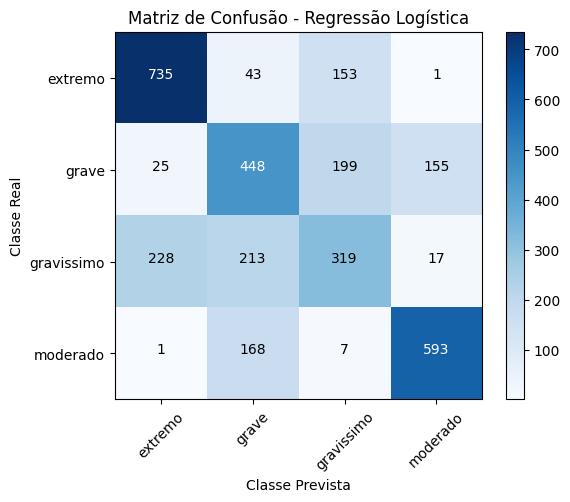

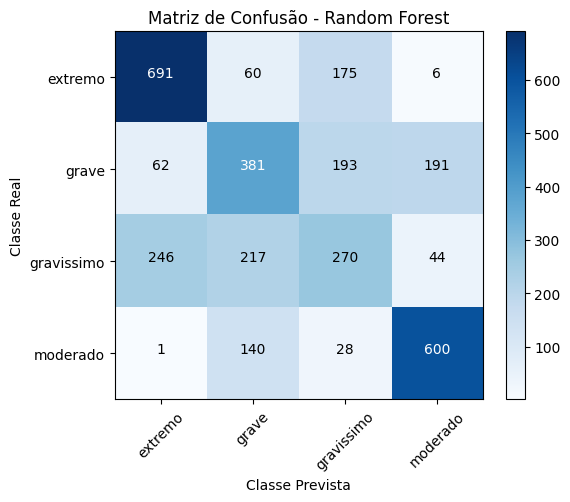

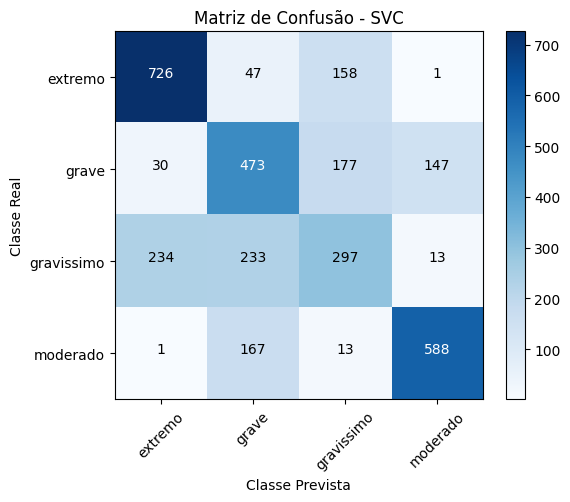

In [ ]:
from sklearn.metrics import confusion_matrix
# Função para plotar a matriz de confusão
def plot_confusion_matrix(cm, classes, title='Matriz de Confusão'):
    plt.figure(figsize=(6,5))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Adiciona os números dentro dos quadrados
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe Real')
    plt.xlabel('Classe Prevista')
    plt.tight_layout()
    plt.show()

# Obtendo as predições de cada modelo
y_pred_logreg = pipe_logreg.predict(X_test)
y_pred_rf     = pipe_rf.predict(X_test)
y_pred_svc    = pipe_svc.predict(X_test)

# Calculando as matrizes de confusão
cm_logreg = confusion_matrix(y_test_enc, y_pred_logreg)
cm_rf     = confusion_matrix(y_test_enc, y_pred_rf)
cm_svc    = confusion_matrix(y_test_enc, y_pred_svc)

# Obter os rótulos originais das classes
classes = le.inverse_transform(np.unique(y_test_enc))

# Plot das matrizes de confusão para cada modelo
plot_confusion_matrix(cm_logreg, classes, title='Matriz de Confusão - Regressão Logística')
plot_confusion_matrix(cm_rf, classes, title='Matriz de Confusão - Random Forest')
plot_confusion_matrix(cm_svc, classes, title='Matriz de Confusão - SVC')